In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%aimport ichol_adadelta
%aimport ichol_constrain_m
%aimport ichol_constrain_m2
%aimport la
%aimport simulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import os.path
from datetime import datetime
import numpy as np
from scipy import linalg
from scipy.io import loadmat, savemat
from pylab import *
from sklearn.decomposition.factor_analysis import FactorAnalysis
import itertools
import ichol_adadelta, ichol_constrain_m, la, ichol_constrain_m2, simulation
import h5py

In [3]:
matfile = h5py.File('data/array5.mat')

In [4]:
allspk = matfile['allspk']

In [5]:
allspk.shape

(3600, 148, 2560)

In [6]:
y = allspk[1800, :].T

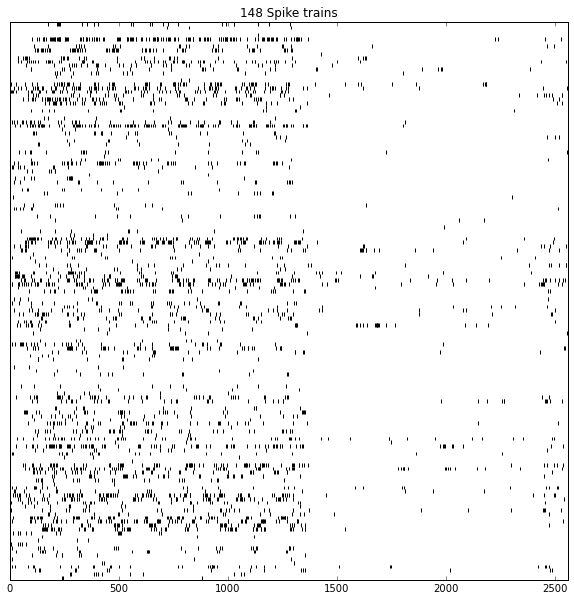

In [7]:
T, N = y.shape
figure(figsize=(10, 10))
xlim(0, T)
ylim(0, N)
for n in range(N):
    vlines(np.arange(T)[y[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks([])
gca().invert_yaxis()

In [8]:
T, N

(2560, 148)

In [10]:
grid = np.logspace(-6, -2, 5)

In [11]:
grid

array([  1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02])

In [13]:
chol_dict = {}

In [14]:
for w in grid:
    chol_dict[w] = la.ichol_gauss(T, w, 500)

/Users/yuan/variational/la.py:40: UserWarning: Not enough ranks
  warnings.warn('Not enough ranks')


0 1e-06 -18257.6559217
1 1e-05 -18143.6408177
2 0.0001 -18108.0600478
3 0.001 -18209.4980489
4 0.01 -18418.6796143


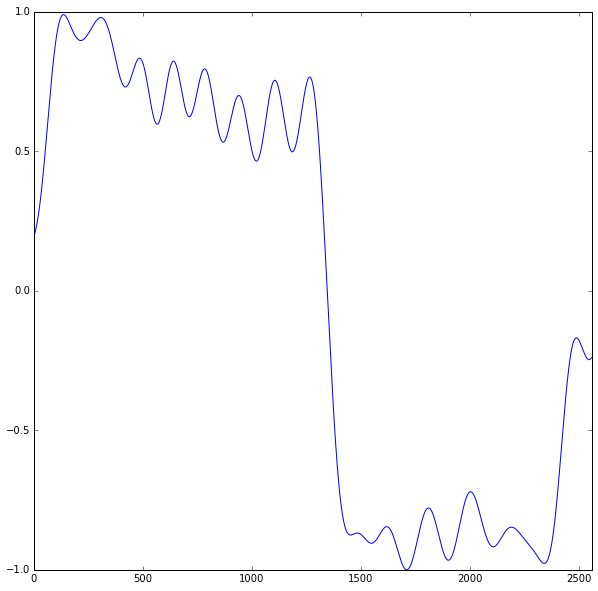

In [90]:
np.random.seed(0)
L = 1
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

grid_w = np.logspace(-6, -2, 5)
best_lb = np.NINF
lb = np.empty(grid_w.shape[0], dtype=float)
for i, w in enumerate(grid_w):
    chol = chol_dict[hash(w)][np.newaxis, ...]
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [96]:
np.random.seed(0)
L = 2
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

grid_w = np.logspace(-6, -2, 5)
best_lb = np.NINF
lb = np.empty(grid_w.shape[0], dtype=float)
for i, w in enumerate(grid_w):
    chol = np.vstack((chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1

0 1e-06 -19238.4942767
1 1e-05 -19255.4345838
2 0.0001 -19000.3250875
3 0.001 -19067.5854131
4 0.01 -19223.970065


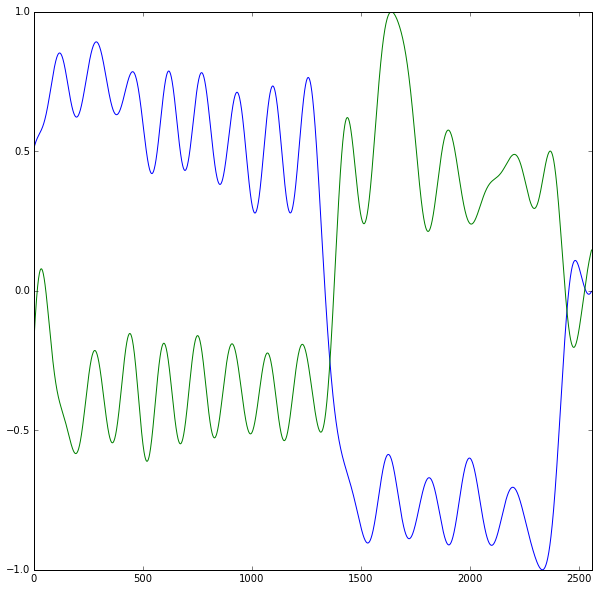

In [97]:
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [98]:
np.random.seed(0)
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

grid_w = np.logspace(-6, -2, 5)
best_lb = np.NINF
lb = np.empty(grid_w.shape[0], dtype=float)
for i, w in enumerate(grid_w):
    chol = np.vstack((chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-5)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1

0 1e-06 -20056.8406116
1 1e-05 -20053.3855658
2 0.0001 -20203.8821496
3 0.001 -20209.5311924
4 0.01 -20390.1169384


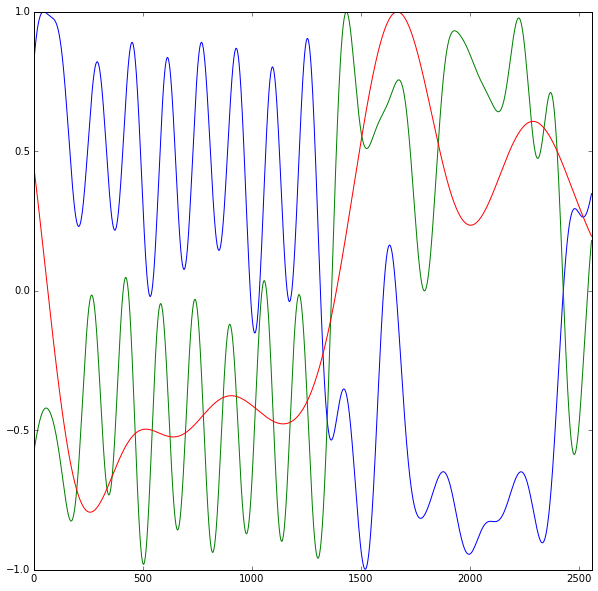

In [99]:
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [100]:
np.random.seed(0)
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

grid_w = np.logspace(-6, -2, 5)
best_lb = np.NINF
lb = np.empty(grid_w.shape[0], dtype=float)
for i, w in enumerate(grid_w):
    chol = np.vstack((chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-5)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1

0 1e-06 -20177.6673665
1 1e-05 -20186.2877216
2 0.0001 -20171.6185448
3 0.001 -20228.3074913
4 0.01 -20387.4869625


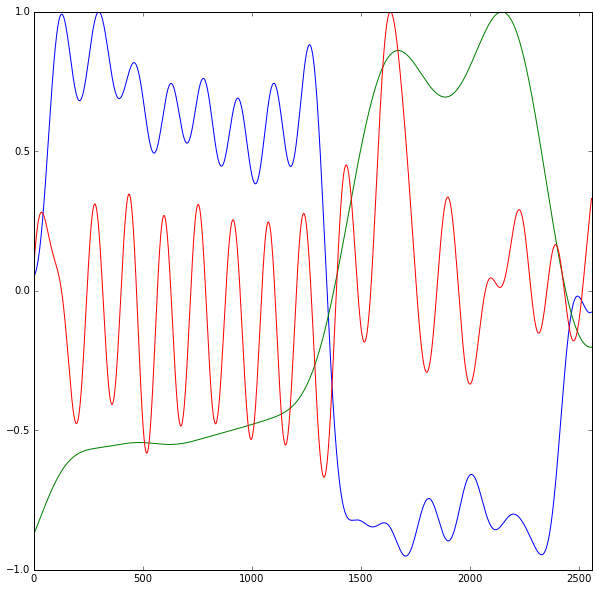

In [101]:
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [102]:
np.random.seed(0)
L = 4
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

grid_w = np.logspace(-6, -2, 5)
best_lb = np.NINF
lb = np.empty(grid_w.shape[0], dtype=float)
for i, w in enumerate(grid_w):
    chol = np.vstack((chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-5)][np.newaxis, ...], chol_dict[hash(1e-6)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1

0 1e-06 -21407.0498161
1 1e-05 -21332.9430381
2 0.0001 -21305.5024853
3 0.001 -21175.597379
4 0.01 -21488.8789253


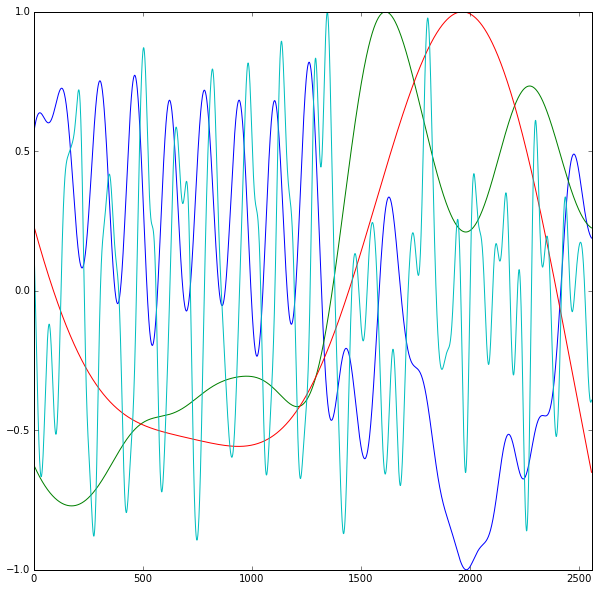

In [103]:
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [104]:
best_w

0.001

In [105]:
np.random.seed(0)
L = 5
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

grid_w = np.logspace(-6, -2, 5)
best_lb = np.NINF
lb = np.empty(grid_w.shape[0], dtype=float)
for i, w in enumerate(grid_w):
    chol = np.vstack((chol_dict[hash(1e-6)][np.newaxis, ...], chol_dict[hash(1e-5)][np.newaxis, ...], chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-3)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1

0 1e-06 -22392.1344594
1 1e-05 -22362.1867368
2 0.0001 -22363.1722978
3 0.001 -22381.043107
4 0.01 -22481.5856675


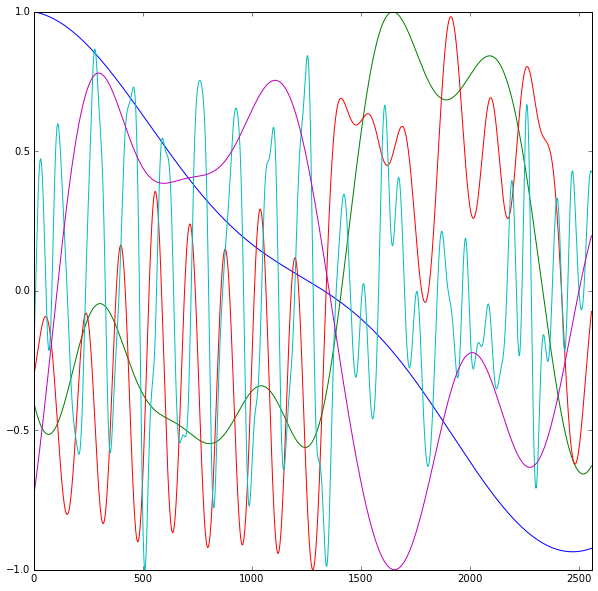

In [106]:
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [107]:
np.random.seed(0)
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

grid_w = np.logspace(-6, -2, 5)
best_lb = np.NINF
lb = np.empty(grid_w.shape[0], dtype=float)
for i, w in enumerate(grid_w):
    chol = np.vstack((chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1

0 1e-06 -20056.8406116
1 1e-05 -20053.3855658
2 0.0001 -20203.8821496
3 0.001 -20209.5311924
4 0.01 -20390.1169384


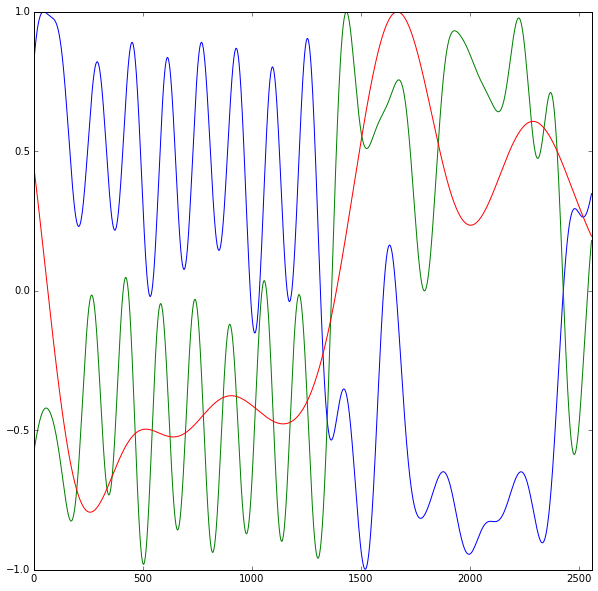

In [108]:
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [109]:
best_w

1.0000000000000001e-05

In [110]:
np.random.seed(0)
L = 4
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

grid_w = np.logspace(-6, -2, 5)
best_lb = np.NINF
lb = np.empty(grid_w.shape[0], dtype=float)
for i, w in enumerate(grid_w):
    chol = np.vstack((chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-5)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1

0 1e-06 -21162.8186816
1 1e-05 -21150.240242
2 0.0001 -21145.5870884
3 0.001 -21155.2739436
4 0.01 -21269.1878248


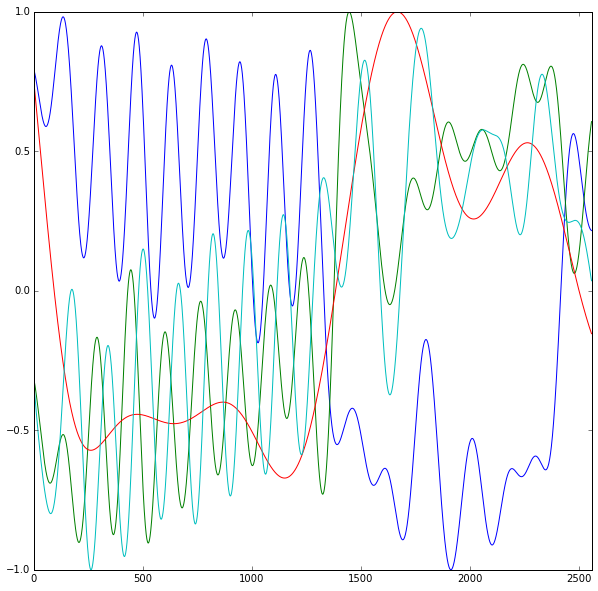

In [111]:
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [112]:
best_w

0.0001

In [113]:
best_lb

-21145.587088360073

In [116]:
chol = np.vstack((chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-4)][np.newaxis, ...], chol_dict[hash(1e-5)][np.newaxis, ...], chol_dict[hash(1e-4)][np.newaxis, ...]))
lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)       

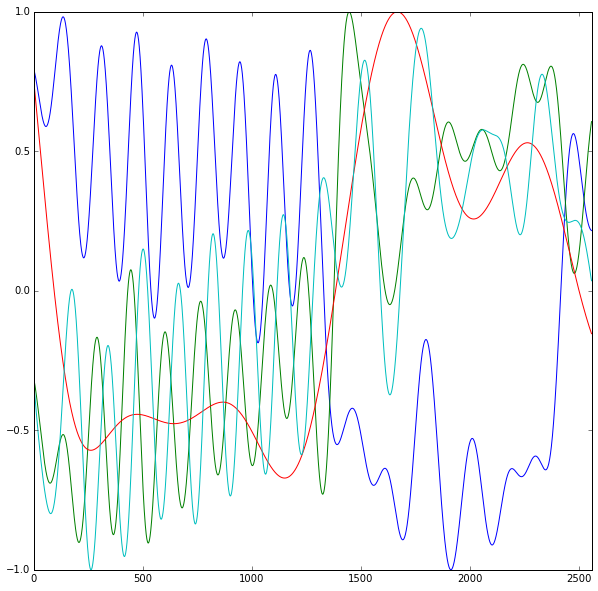

In [117]:
figure(figsize=(10, 10))
xlim(0, T)
plot(m1)

In [119]:
L4 = {}
L4['w'] = np.array([1e-4, 1e-4, 1e-5, 1e-4])
L4['m'] = m1

In [120]:
savemat('data/L4', L4)

In [121]:
converged

True

In [123]:
y.shape

(2560, 148)

In [126]:
np.corrcoef(y.T, m1[:, 0])

/Users/yuan/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:1957: RuntimeWarning: invalid value encountered in true_divide
  return c / sqrt(multiply.outer(d, d))


array([[ 1.        , -0.00340155,         nan, ...,  0.05420582,
        -0.00340155,  0.04198946],
       [-0.00340155,  1.        ,         nan, ..., -0.00225013,
        -0.00117325,  0.02643576],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ..., 
       [ 0.05420582, -0.00225013,         nan, ...,  1.        ,
        -0.00225013,  0.02745688],
       [-0.00340155, -0.00117325,         nan, ..., -0.00225013,
         1.        ,  0.00936389],
       [ 0.04198946,  0.02643576,         nan, ...,  0.02745688,
         0.00936389,  1.        ]])

In [131]:
from scipy import stats

In [137]:
stats.pearsonr(y[:, 0], m1[:, 0])

(0.041989455197724436, 0.033635342094283309)

In [135]:
N

148

In [136]:
corr = np.empty((N, 4), dtype=float)

In [138]:
for i in range(N):
    for j in range(4):
        corr[i, j], _ = stats.pearsonr(y[:, i], m1[:, j])

/Users/yuan/anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:2542: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [152]:
from matplotlib import gridspec

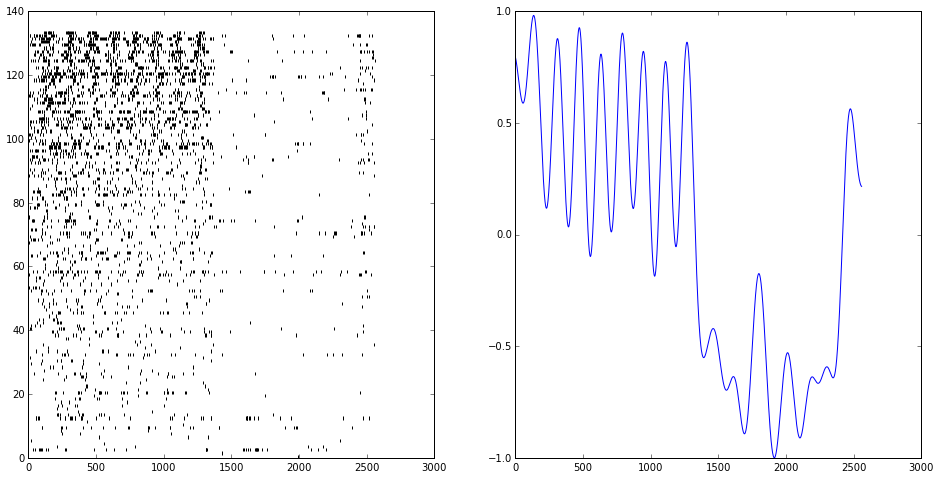

In [153]:
l = 0
fig =  figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2)
ax1 = subplot(gs[0])
sy = y[:, corr[:, l].argsort()]
for n in range(N):
    ax1.vlines(np.arange(T)[sy[:, n] > 0], n, n + 1, color='black')
ax2 = subplot(gs[1])
ax2.plot(m1[:, l])

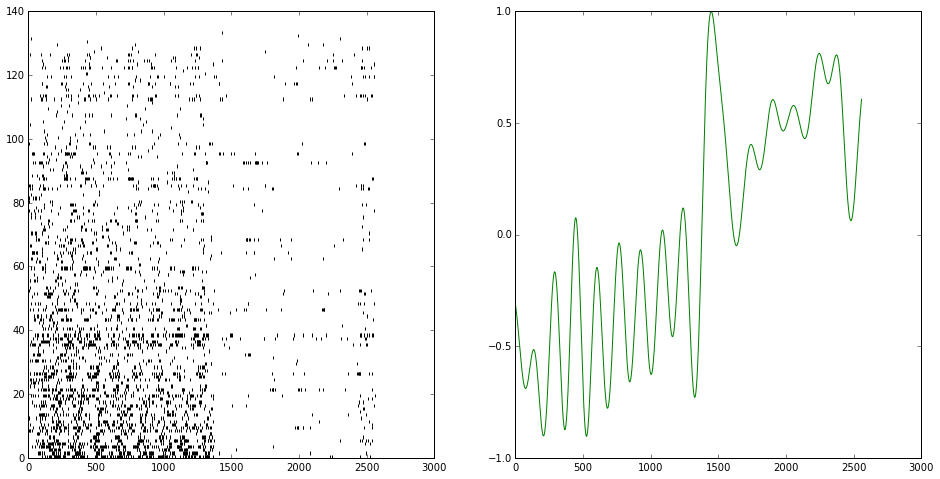

In [161]:
l = 1
fig =  figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2)
ax1 = subplot(gs[0])
sy = y[:, corr[:, l].argsort()]
for n in range(N):
    ax1.vlines(np.arange(T)[sy[:, n] > 0], n, n + 1, color='black')
ax2 = subplot(gs[1])
ax2.plot(m1[:, l], color='g')

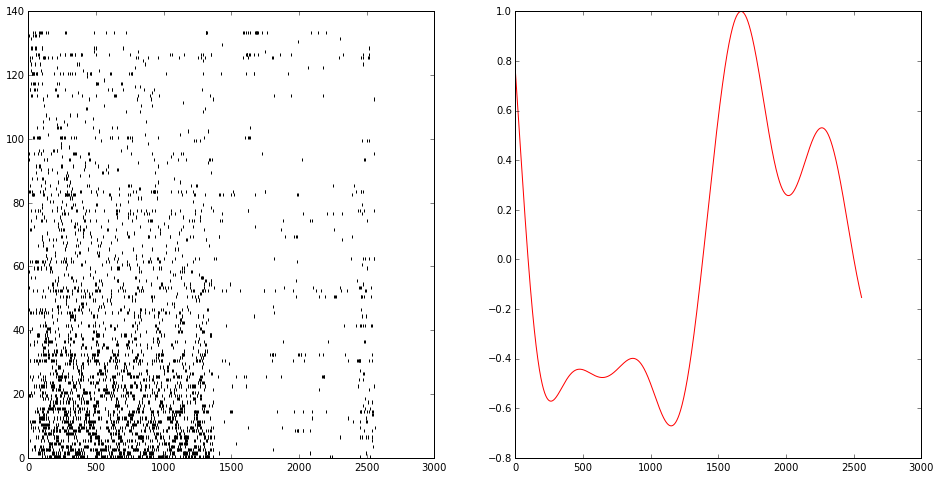

In [162]:
l = 2
fig =  figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2)
ax1 = subplot(gs[0])
sy = y[:, corr[:, l].argsort()]
for n in range(N):
    ax1.vlines(np.arange(T)[sy[:, n] > 0], n, n + 1, color='black')
ax2 = subplot(gs[1])
ax2.plot(m1[:, l], color='r')

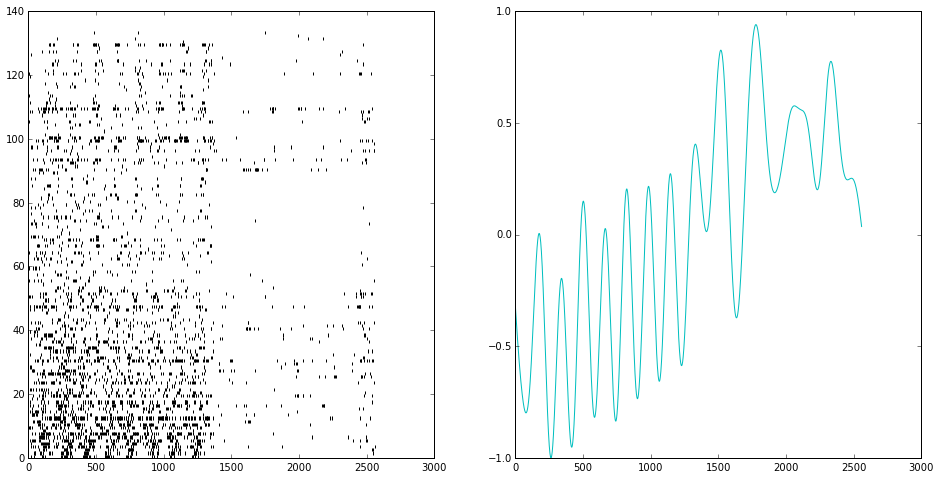

In [163]:
l = 3
fig =  figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2)
ax1 = subplot(gs[0])
sy = y[:, corr[:, l].argsort()]
for n in range(N):
    ax1.vlines(np.arange(T)[sy[:, n] > 0], n, n + 1, color='black')
ax2 = subplot(gs[1])
ax2.plot(m1[:, l], color='c')

In [160]:
y[:, 2].sum()

0.0

# Fine grid

0 1e-05 -18143.6408177
1 3.16227766017e-05 -18113.7931851
2 0.0001 -18108.0600478
3 0.000316227766017 -18127.2992448
4 0.001 -18209.4980489


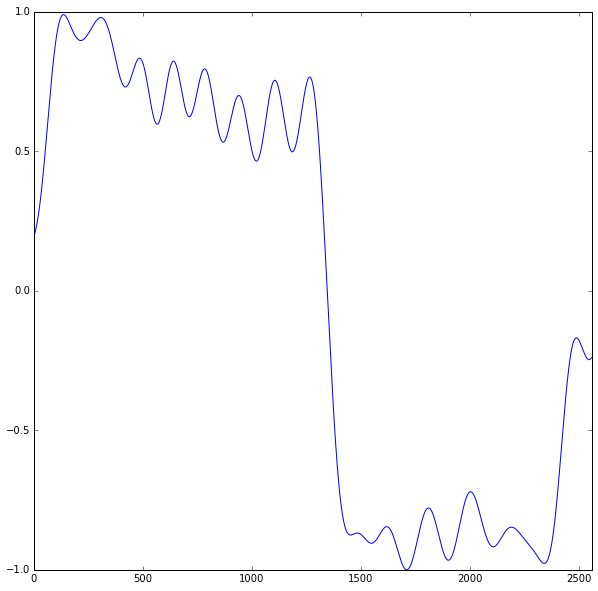

In [171]:
np.random.seed(0)
L = 1
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

best_lb = np.NINF
lb = np.empty(grid.shape[0], dtype=float)
for i, w in enumerate(grid):
    chol = chol_dict[hash(w)][np.newaxis, ...]
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [172]:
best_w

0.0001

0 1e-05 -19255.4345838
1 3.16227766017e-05 -19277.5044282
2 0.0001 -19000.3250875
3 0.000316227766017 -19034.050245
4 0.001 -19067.5854131


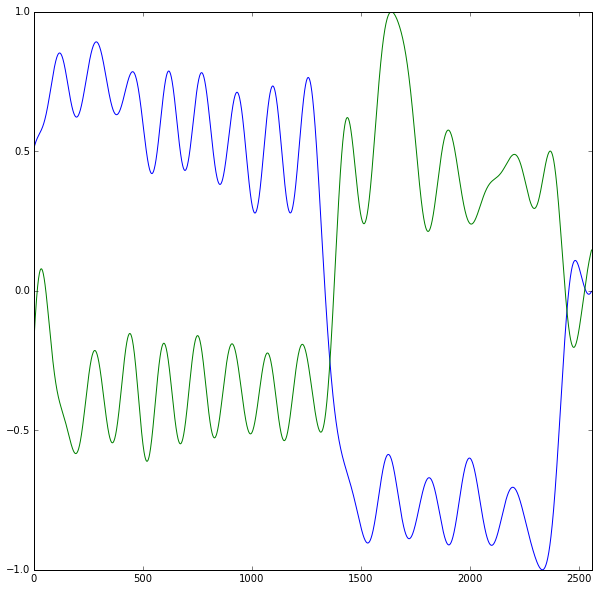

In [173]:
np.random.seed(0)
L = 2
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

best_lb = np.NINF
lb = np.empty(grid.shape[0], dtype=float)
for i, w in enumerate(grid):
    chol = np.vstack((chol_dict[hash(0.0001)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [174]:
best_w

0.0001

0 1e-05 -20053.3855658
1 3.16227766017e-05 -20074.4408065
2 0.0001 -20203.8821496
3 0.000316227766017 -20195.8489783
4 0.001 -20209.5311924


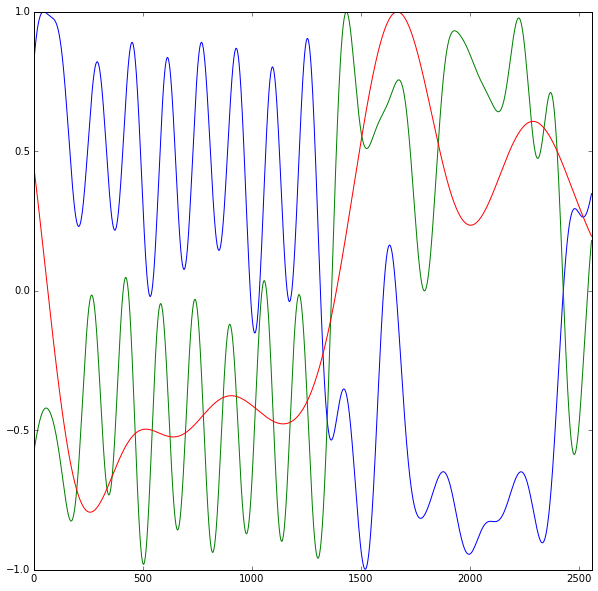

In [175]:
np.random.seed(0)
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

best_lb = np.NINF
lb = np.empty(grid.shape[0], dtype=float)
for i, w in enumerate(grid):
    chol = np.vstack((chol_dict[hash(0.0001)][np.newaxis, ...], chol_dict[hash(0.0001)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [176]:
best_w

1.0000000000000001e-05

In [181]:
chol_dict.keys()

dict_keys([2080667128278315218, 2062655921051523059, 1153650676190436165, 2197829535315160966, 2170758078822671208, 936979306793984537, 23058430092136940, 1599906073466377917, 2305843009213694, 716085307460043685])

0 1e-06 -20056.8406116
1 1.77827941004e-06 -20047.679382
2 3.16227766017e-06 -20037.0836418
3 5.6234132519e-06 -20040.117484
4 1e-05 -20053.3855658


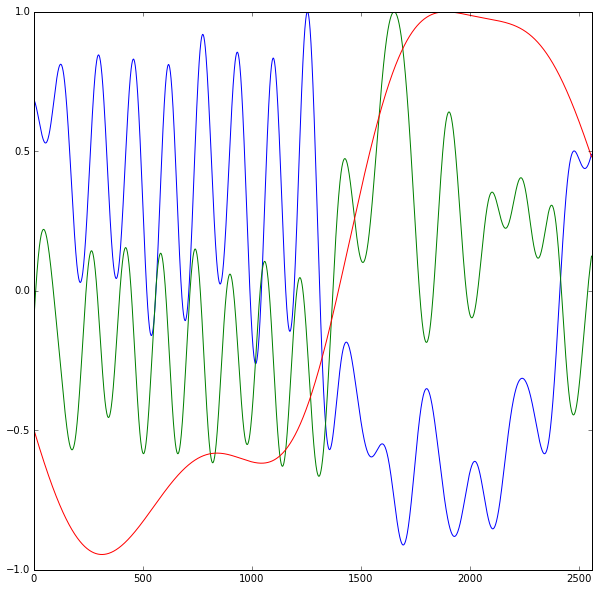

In [184]:
np.random.seed(0)
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

best_lb = np.NINF
lb = np.empty_like(np.logspace(-6, -5, 5), dtype=float)
for i, w in enumerate(np.logspace(-6, -5, 5)):
    chol = np.vstack((chol_dict[hash(0.0001)][np.newaxis, ...], chol_dict[hash(0.0001)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [185]:
w1=w2=1e-4

In [186]:
best_w

3.1622776601683792e-06

In [187]:
w3=best_w

0 1e-05 -21170.4781736
1 3.16227766017e-05 -21183.7589467
2 0.0001 -21235.9124712
3 0.000316227766017 -21129.6175546
4 0.001 -21158.9908636


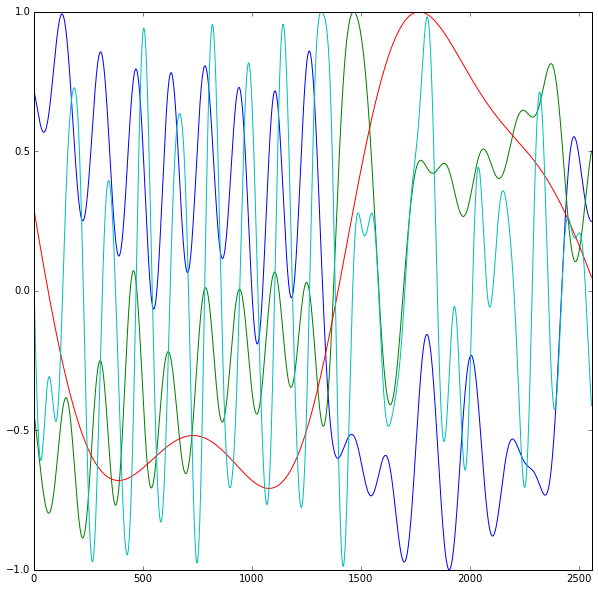

In [188]:
np.random.seed(0)
L = 4
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

best_lb = np.NINF
lb = np.empty_like(grid, dtype=float)
for i, w in enumerate(grid):
    chol = np.vstack((chol_dict[hash(0.0001)][np.newaxis, ...], chol_dict[hash(0.0001)][np.newaxis, ...], chol_dict[hash(w3)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [189]:
best_w

0.00031622776601683794

In [190]:
w3

3.1622776601683792e-06

In [191]:
w4=best_w

In [192]:
w3 * 10 == w4

False

In [193]:
w3

3.1622776601683792e-06

In [194]:
w4

0.00031622776601683794

In [208]:
np.sign(m1[0, :])

array([ 1., -1.,  1.,  1.])

In [211]:
flip = m1 * np.array([1, -1, -1, -1])

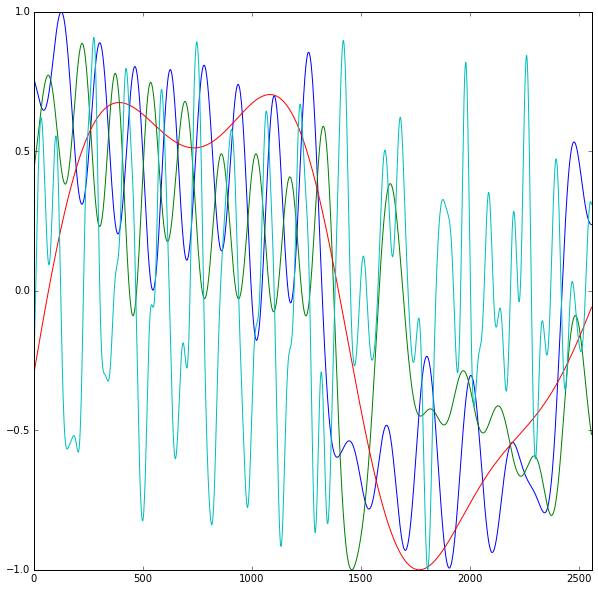

In [213]:
figure(figsize=(10, 10))
xlim(0, T)
plot(flip)

In [197]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    from scipy import linalg
    from numpy import eye, asarray, dot, sum
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = linalg.svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

In [198]:
rot = varimax(m1)

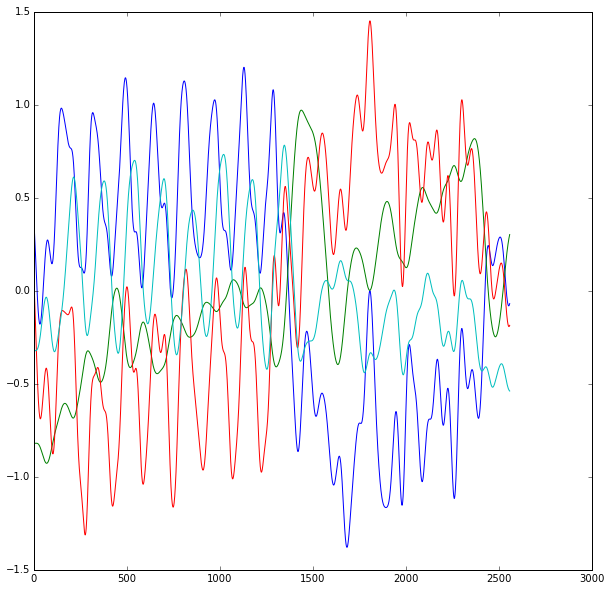

In [202]:
figure(figsize=(10, 10))
plot(rot)

In [215]:
import simulation

In [217]:
sim, _, _ = simulation.spikes(m1, a1, b1, intercept=True)

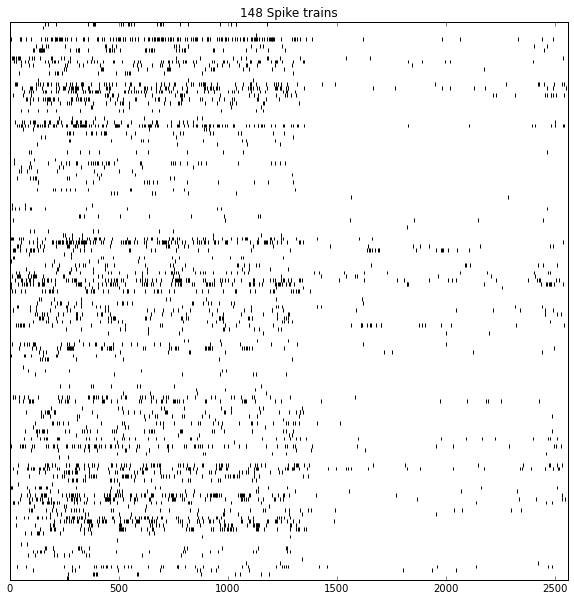

In [221]:
figure(figsize=(10, 10))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[sim[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks([])
gca().invert_yaxis()

In [222]:
w3 = 4e-6

In [223]:
chol_dict[hash(w3)] = la.ichol_gauss(T, w3, 500)

In [224]:
chol_dict.keys()

dict_keys([1787938275438123766, 2080667128278315218, 2062655921051523059, 1153650676190436165, 2197829535315160966, 2170758078822671208, 936979306793984537, 23058430092136940, 1599906073466377917, 2305843009213694, 716085307460043685])

In [225]:
w1

0.0001

In [226]:
w2

0.0001

0 1e-05 -21183.1058127
1 3.16227766017e-05 -21196.947501
2 0.0001 -21152.1469813
3 0.000316227766017 -21126.6861429
4 0.001 -21154.7515316


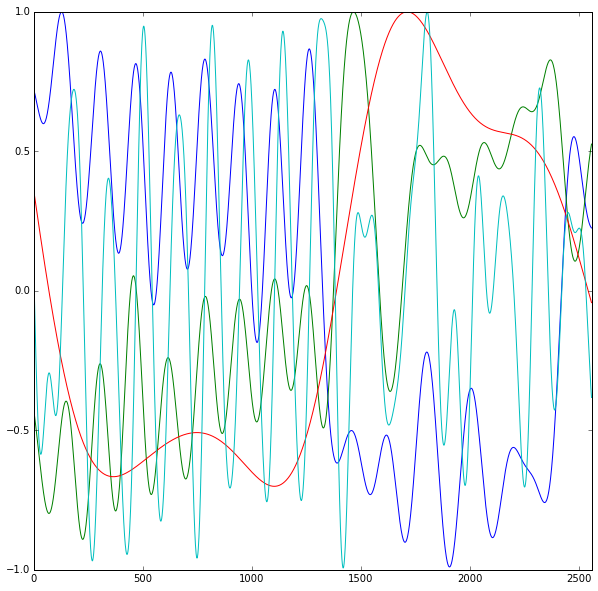

In [229]:
np.random.seed(0)
L = 4
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
var = 5 * np.ones(L, dtype=float)

best_lb = np.NINF
lb = np.empty_like(grid, dtype=float)
for i, w in enumerate(grid):
    chol = np.vstack((chol_dict[hash(w1)][np.newaxis, ...], chol_dict[hash(w2)][np.newaxis, ...], chol_dict[hash(w3)][np.newaxis, ...], chol_dict[hash(w)][np.newaxis, ...]))
    lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, w, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = w
        best_m = m1
figure(figsize=(10, 10))
xlim(0, T)
plot(best_m)

In [230]:
best_w

0.00031622776601683794

In [231]:
w4 = 4e-4

In [232]:
chol_dict[hash(w4)] = la.ichol_gauss(T, w4, 500)
chol = np.vstack((chol_dict[hash(w1)][np.newaxis, ...], chol_dict[hash(w2)][np.newaxis, ...], chol_dict[hash(w4)][np.newaxis, ...]))

In [235]:
chol = np.vstack((chol_dict[hash(w1)][np.newaxis, ...], chol_dict[hash(w2)][np.newaxis, ...], chol_dict[hash(w4)][np.newaxis, ...]))
lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 1, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=True)


Iteration[1]
lower bound = -150517.54614
increment = 37846564.5510827154
time = 6.62s
change in a = 0.0996782304
change in b = 1.0008452265
change in m = 1.3188837149


Iteration[2]
lower bound = -64465.60428
increment = 86051.9418612788
time = 6.58s
change in a = 0.2208507082
change in b = 1.0021483374
change in m = 0.7443717249


Iteration[3]
lower bound = -33941.82698
increment = 30523.7773011866
time = 6.58s
change in a = 0.2178781234
change in b = 1.3040203599
change in m = 1.2682635838


Iteration[4]
lower bound = -23130.84846
increment = 10810.9785175234
time = 6.65s
change in a = 0.2250863918
change in b = 1.4825882321
change in m = 0.4225362174


Iteration[5]
lower bound = -19172.87457
increment = 3957.9738919161
time = 6.55s
change in a = 0.1929712149
change in b = 3.1288476767
change in m = 0.2283328690


Iteration[6]
lower bound = -17591.00741
increment = 1581.8671588317
time = 6.49s
change in a = 0.2011984397
change in b = 3.7608447075
change in m = 0.2968690618


Iterati

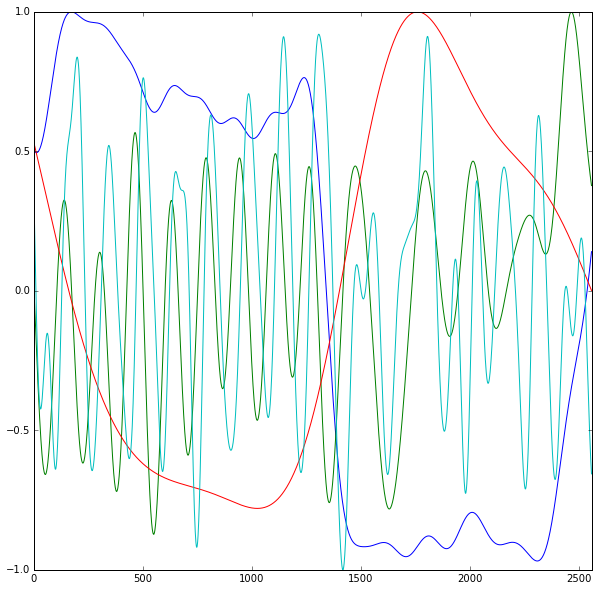

In [236]:
figure(figsize=(10, 10))
xlim(0, T)
plot(m1)

In [246]:
sim, _, _ = simulation.spikes(m1, a1, b1, intercept=True)

/Users/yuan/variational/simulation.py:92: RuntimeWarning: overflow encountered in exp
  rate[t, :] = np.exp(np.dot(regressor[t, :], beta) + np.dot(latent[t, :], alpha))


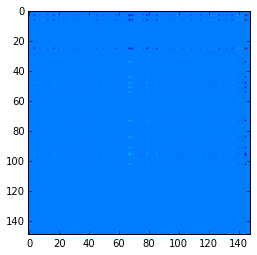

In [256]:
imshow(b1)

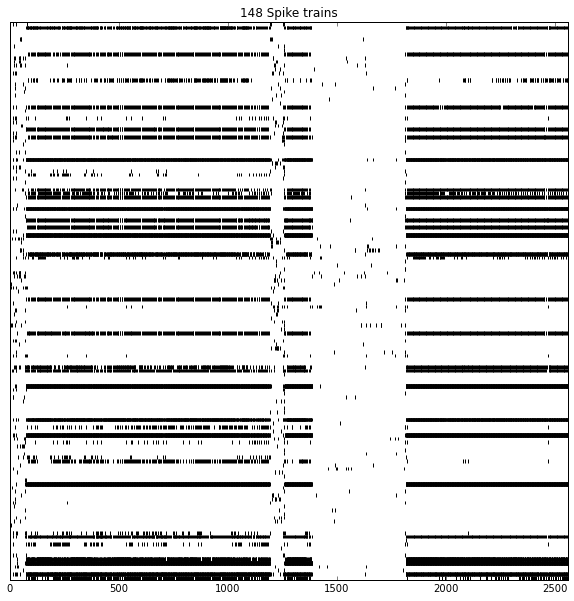

In [247]:
figure(figsize=(10, 10))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[sim[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks([])
gca().invert_yaxis()

In [250]:
b2 = np.zeros_like(b1)
np.fill_diagonal(b2[1:, :], b1[1:, :].diagonal())
b2[0, :] = b1[0, :]

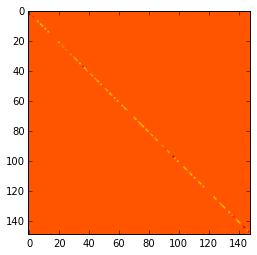

In [252]:
imshow(b2)

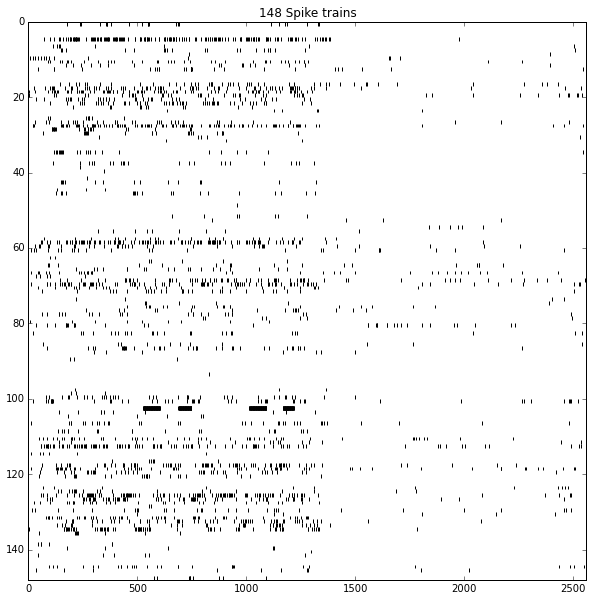

In [265]:
sim, _, _ = simulation.spikes(m1, a1, b2, intercept=True)
figure(figsize=(10, 10))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[sim[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks()
gca().invert_yaxis()

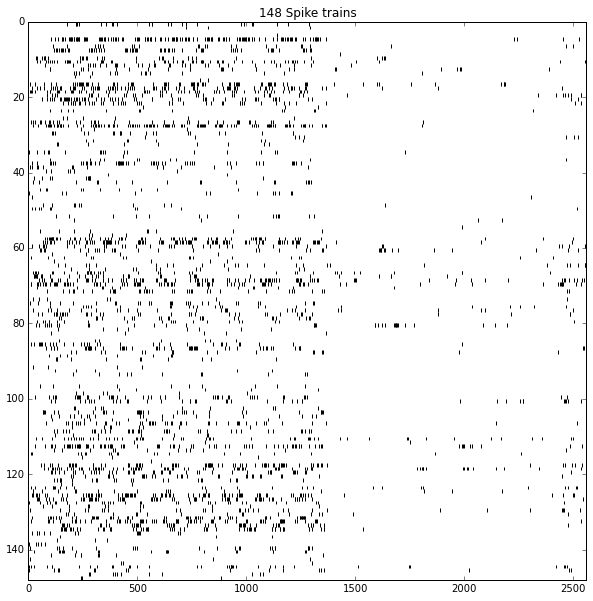

In [264]:
figure(figsize=(10, 10))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[y[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks()
gca().invert_yaxis()


Iteration[1]
lower bound = -148570.36700
increment = 64132231.4297215641
time = 13.28s
change in a = 0.0962788448
change in b = 1.0018001721
change in m = 1.2826872247


Iteration[2]
lower bound = -62267.71018
increment = 86302.6568216418
time = 13.01s
change in a = 0.1733585753
change in b = 1.0047245601
change in m = 0.2999690476


Iteration[3]
lower bound = -31015.32155
increment = 31252.3886281745
time = 12.94s
change in a = 0.0809982475
change in b = 1.4820731328
change in m = 0.3238745144


Iteration[4]
lower bound = -19320.37057
increment = 11694.9509823220
time = 12.86s
change in a = 0.0940979898
change in b = 2.4342071119
change in m = 0.4265366791


Iteration[5]
lower bound = -14586.14748
increment = 4734.2230874249
time = 12.65s
change in a = 0.0868506439
change in b = 3.9636828125
change in m = 0.5240205791


Iteration[6]
lower bound = -12467.15048
increment = 2118.9969995313
time = 12.46s
change in a = 0.0950625658
change in b = 8.7383507205
change in m = 0.0000000000


I

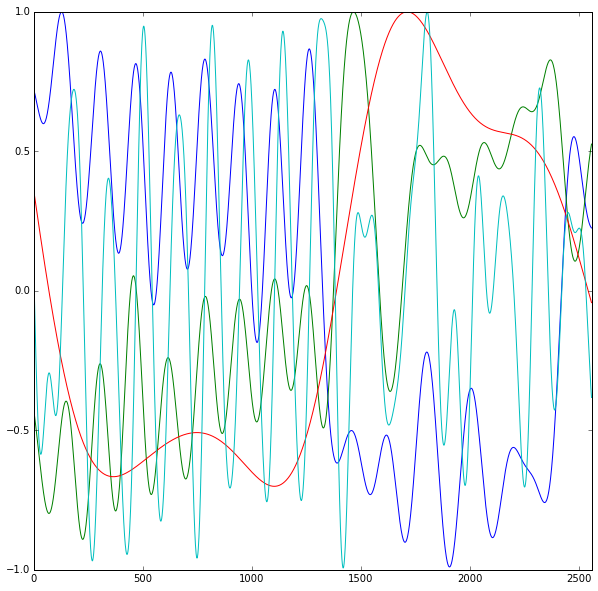

In [268]:
np.random.seed(0)
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
chol = np.vstack((chol_dict[hash(w1)][np.newaxis, ...], chol_dict[hash(w2)][np.newaxis, ...], chol_dict[hash(w3)][np.newaxis, ...], chol_dict[hash(w4)][np.newaxis, ...]))
lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 2, chol, a0=a0, b0=None, m0=m0, niter=100, tol=5e-4, verbose=True)

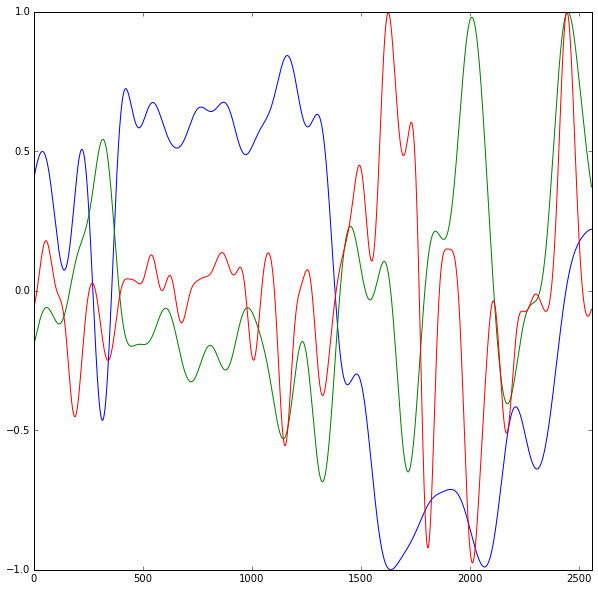

In [269]:
figure(figsize=(10, 10))
xlim(0, T)
plot(m1)

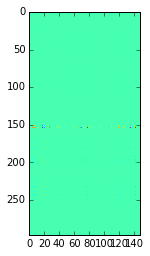

In [270]:
imshow(b1)

/Users/yuan/variational/simulation.py:92: RuntimeWarning: overflow encountered in exp
  rate[t, :] = np.exp(np.dot(regressor[t, :], beta) + np.dot(latent[t, :], alpha))


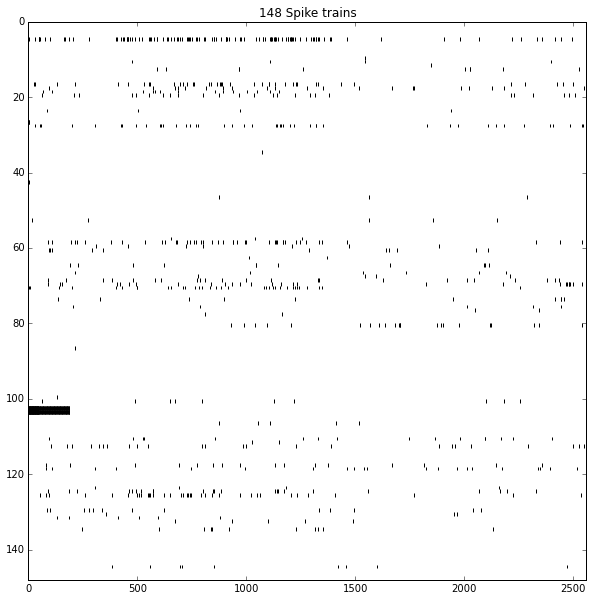

In [275]:
sim, _, _ = simulation.spikes(m1, a1, b2, intercept=True)
figure(figsize=(10, 10))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[sim[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks()
gca().invert_yaxis()

In [272]:
b2 = np.zeros_like(b1)
np.fill_diagonal(b2[1:N, :], b1[1:N, :].diagonal())
np.fill_diagonal(b2[N:, :], b1[N:, :].diagonal())
b2[0, :] = b1[0, :]

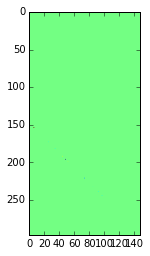

In [273]:
imshow(b2)

In [274]:
b2

array([[-52.9907286 , -29.08617054, -28.        , ..., -74.81801783,
        -33.41166584, -28.2347417 ],
       [  9.73184667,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   1.09011517,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.75042781,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.71012719],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [295]:
np.random.seed(0)
L = 4
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
chol = np.vstack((chol_dict[hash(w1)][np.newaxis, ...], chol_dict[hash(w2)][np.newaxis, ...], chol_dict[hash(w3)][np.newaxis, ...], chol_dict[hash(w4)][np.newaxis, ...]))
lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 2, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-4, verbose=True)


Iteration[1]
lower bound = -239785.02826
increment = 37757169.0407917574
time = 19.53s
change in a = 0.0603533639
change in b = 0.5008919610
change in m = 1.3994032904


Iteration[2]
lower bound = -150173.38119
increment = 89611.6470718720
time = 21.09s
change in a = 0.3042779178
change in b = 0.5014345472
change in m = 0.5524185365


Iteration[3]
lower bound = -96146.02230
increment = 54027.3588874761
time = 20.65s
change in a = 0.2014798827
change in b = 0.5152470573
change in m = 1.7744402730


Iteration[4]
lower bound = -63677.26855
increment = 32468.7537528609
time = 19.53s
change in a = 0.0868590231
change in b = 0.5677132363
change in m = 0.3913175484


Iteration[5]
lower bound = -44099.38756
increment = 19577.8809873705
time = 20.71s
change in a = 0.0479923095
change in b = 0.7353187921
change in m = 0.6683367427


Iteration[6]
lower bound = -32220.39585
increment = 11878.9917164302
time = 19.93s
change in a = 0.0719174156
change in b = 0.8670183015
change in m = 0.6340308163


In [292]:
b2 = np.zeros_like(b1)
np.fill_diagonal(b2[1:N, :], b1[1:N, :].diagonal())
np.fill_diagonal(b2[N:, :], b1[N:, :].diagonal())
b2[0, :] = b1[0, :]

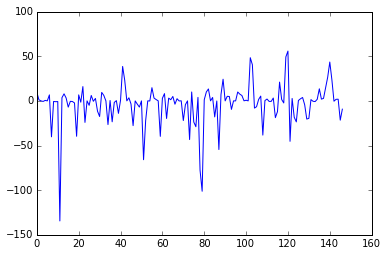

In [298]:
plot(b1[1:N, :].diagonal())

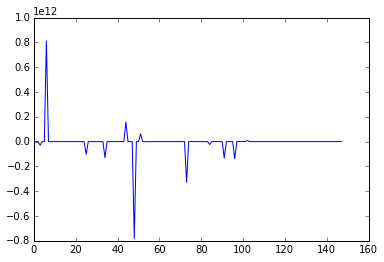

In [299]:
plot(b1[N:, :].diagonal())

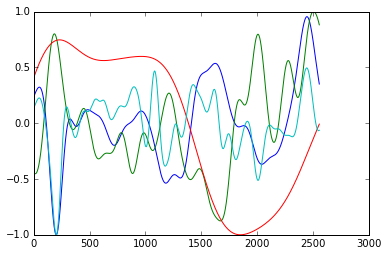

In [300]:
plot(m1)

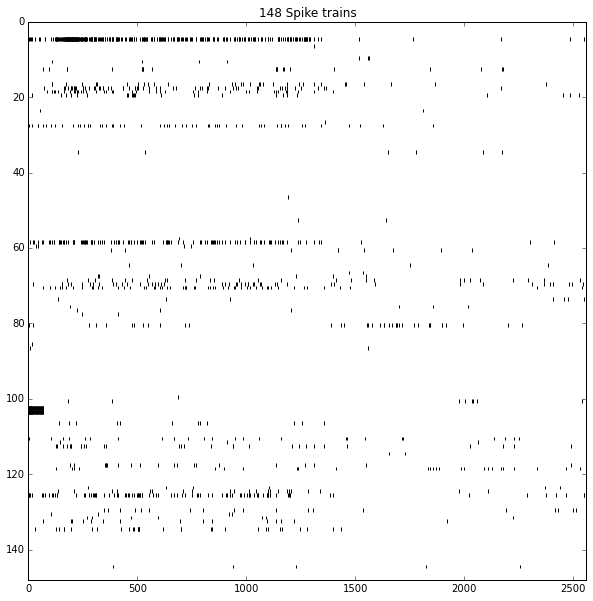

In [301]:
sim, _, _ = simulation.spikes(m1, a1, b2, intercept=True)
figure(figsize=(10, 10))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[sim[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks()
gca().invert_yaxis()

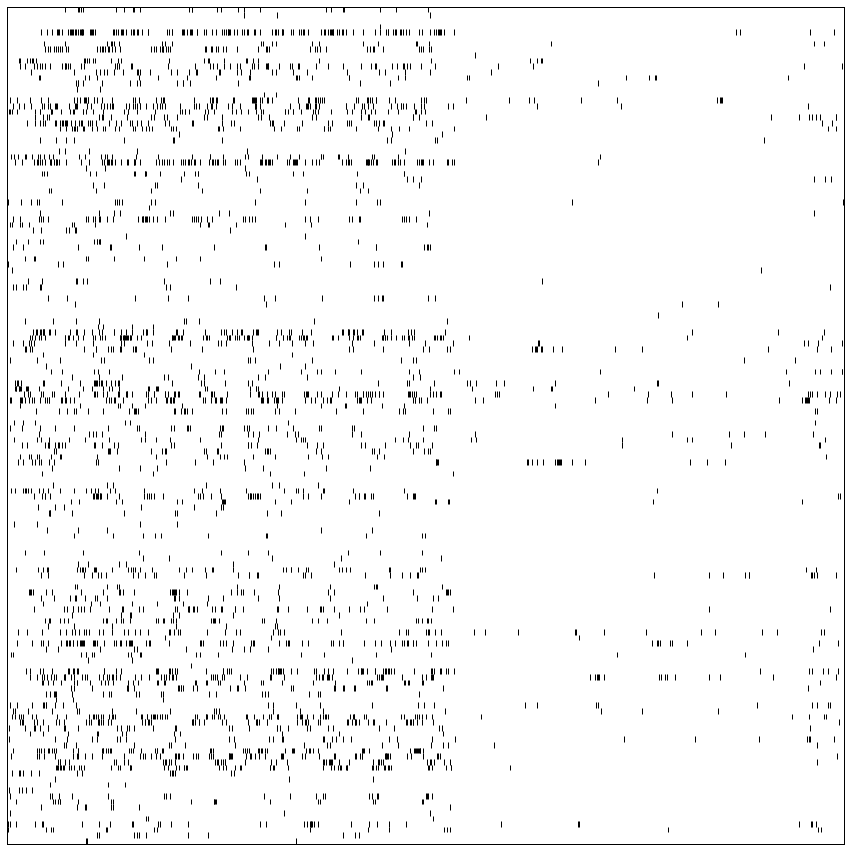

In [308]:
figure(figsize=(15, 15))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[y[:, n] > 0], n, n + 1, color='black')
yticks([])
xticks([])
gca().invert_yaxis()
savefig('raster of real.pdf')

In [305]:
savefig('raster of real.pdf')

In [309]:
L4_2

{'m': array([[ 0.76097716, -0.42714042,  0.30058757,  0.28787109],
        [ 0.75875188, -0.43323208,  0.29597019,  0.26159236],
        [ 0.75639819, -0.43939768,  0.29135621,  0.23357142],
        ..., 
        [ 0.23757879,  0.50467028,  0.063489  , -0.31737885],
        [ 0.23724961,  0.50987003,  0.06152536, -0.31429539],
        [ 0.23706861,  0.51489411,  0.05956021, -0.31010678]]),
 'w': array([  1.00000000e-04,   1.00000000e-04,   3.16227766e-06,
          3.16227766e-04])}

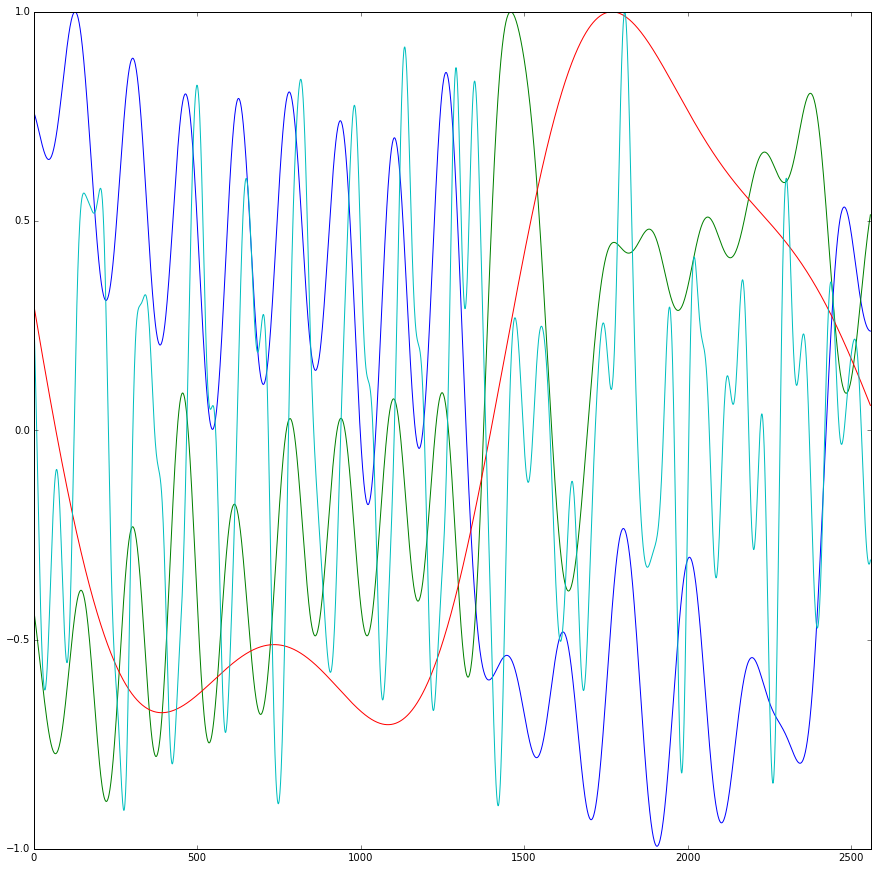

In [311]:
figure(figsize=(15, 15))
xlim(0, T)
plot(L4_2['m'])

In [312]:
L4_2['w']

array([  1.00000000e-04,   1.00000000e-04,   3.16227766e-06,
         3.16227766e-04])

In [315]:
w1,w2,w3,w4

(0.0001, 0.0001, 4e-06, 0.0004)

In [320]:
np.random.seed(0)
L = 4
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)

chol = np.vstack((chol_dict[hash(w1)][np.newaxis, ...], chol_dict[hash(w2)][np.newaxis, ...], chol_dict[hash(w3)][np.newaxis, ...], chol_dict[hash(w4)][np.newaxis, ...]))
lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 1, chol, a0=a0, b0=None, m0=m0, niter=100, tol=1e-5, verbose=True)


Iteration[1]
lower bound = -150517.54614
increment = 37846564.5510827154
time = 6.65s
change in a = 0.0996782304
change in b = 1.0008452265
change in m = 1.3188837149


Iteration[2]
lower bound = -64465.60428
increment = 86051.9418612788
time = 6.68s
change in a = 0.2208507082
change in b = 1.0021483374
change in m = 0.7443717249


Iteration[3]
lower bound = -33941.82698
increment = 30523.7773011866
time = 6.65s
change in a = 0.2178781234
change in b = 1.3040203599
change in m = 1.2682635838


Iteration[4]
lower bound = -23130.84846
increment = 10810.9785175234
time = 7.03s
change in a = 0.2250863918
change in b = 1.4825882321
change in m = 0.4225362174


Iteration[5]
lower bound = -19172.87457
increment = 3957.9738919161
time = 7.07s
change in a = 0.1929712149
change in b = 3.1288476767
change in m = 0.2283328690


Iteration[6]
lower bound = -17591.00741
increment = 1581.8671588317
time = 6.72s
change in a = 0.2011984397
change in b = 3.7608447075
change in m = 0.2968690618


Iterati

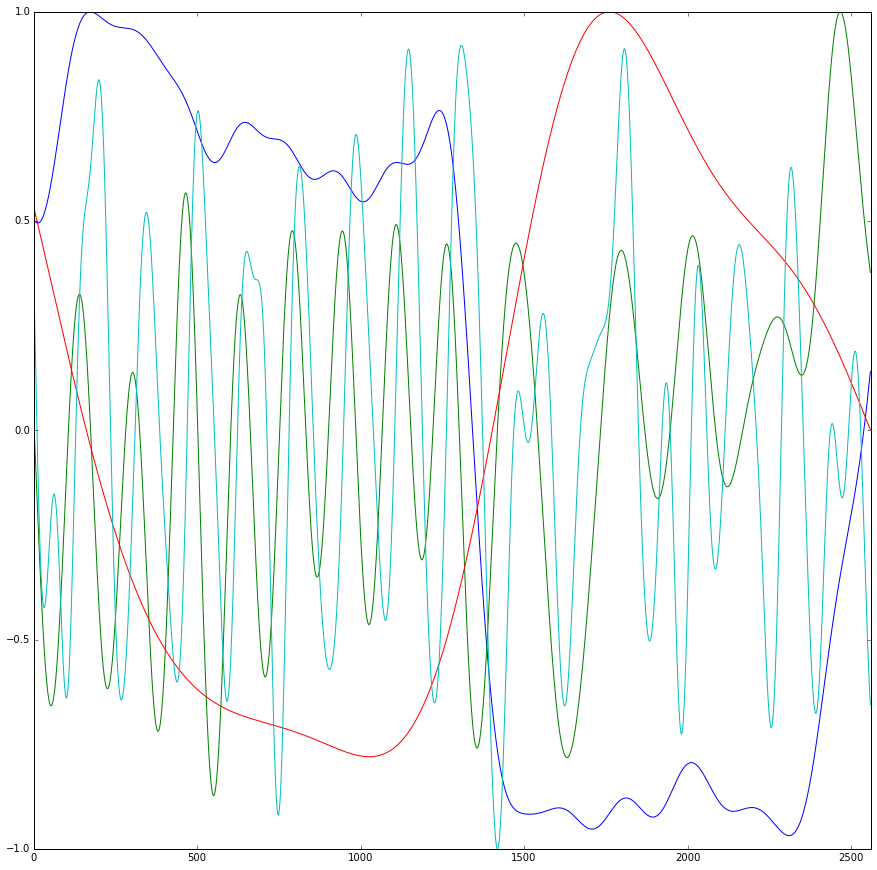

In [321]:
figure(figsize=(15, 15))
xlim(0, T)
plot(m1)
savefig('4 latents p=1.pdf')

In [322]:
L4_3 = {}
L4_3['m'] = m1
L4_3['w'] = np.array([w1,w2,w3,w4])
L4_3['p'] = 1
L4_3['lbound'] = lbound
L4_3['a'] = a1
L4_3['b'] = b1
savemat('data/L4p1', L4_3)

In [323]:
np.random.seed(0)
L = 4
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)

chol = np.vstack((chol_dict[hash(w1)][np.newaxis, ...], chol_dict[hash(w2)][np.newaxis, ...], chol_dict[hash(w3)][np.newaxis, ...], chol_dict[hash(w4)][np.newaxis, ...]))
lbound, m1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 0, chol, a0=a0, b0=None, m0=m0, niter=50, tol=5e-5, verbose=True)


Iteration[1]
lower bound = -151096.53915
increment = 37846123.9086091295
time = 5.00s
change in a = 0.1530237069
change in b = 1.0000000000
change in m = 1.5425757403


Iteration[2]
lower bound = -65504.15161
increment = 85592.3875440611
time = 4.95s
change in a = 0.2685595821
change in b = 1.0000000000
change in m = 0.9021195435


Iteration[3]
lower bound = -35909.15030
increment = 29595.0013101197
time = 5.40s
change in a = 0.3425471559
change in b = 1.0000000000
change in m = 0.8099635745


Iteration[4]
lower bound = -26266.13737
increment = 9643.0129306876
time = 5.60s
change in a = 0.3294633807
change in b = 1.0000000000
change in m = 0.6344860163


Iteration[5]
lower bound = -23202.73632
increment = 3063.4010440693
time = 5.01s
change in a = 0.3021070492
change in b = 1.0000000000
change in m = 0.3087086730


Iteration[6]
lower bound = -22311.79984
increment = 890.9364823936
time = 5.07s
change in a = 0.3200386662
change in b = 1.0000000000
change in m = 0.2000355196


Iteration

In [325]:
L4_4 = {}
L4_4['m'] = m1
L4_4['w'] = np.array([w1,w2,w3,w4])
L4_4['p'] = 0
L4_4['lbound'] = lbound
L4_4['a'] = a1
L4_4['b'] = b1
savemat('data/L4p0', L4_4)

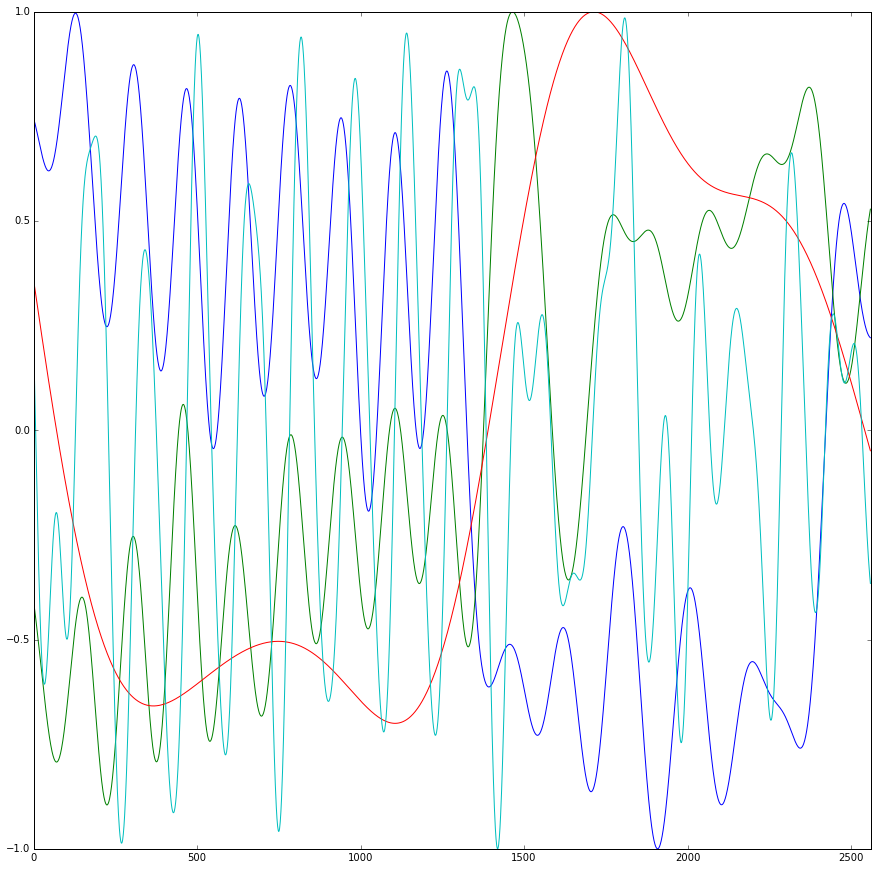

In [324]:
figure(figsize=(15, 15))
xlim(0, T)
plot(m1)
savefig('4 latents p=0.pdf')

/Users/yuan/anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:2542: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


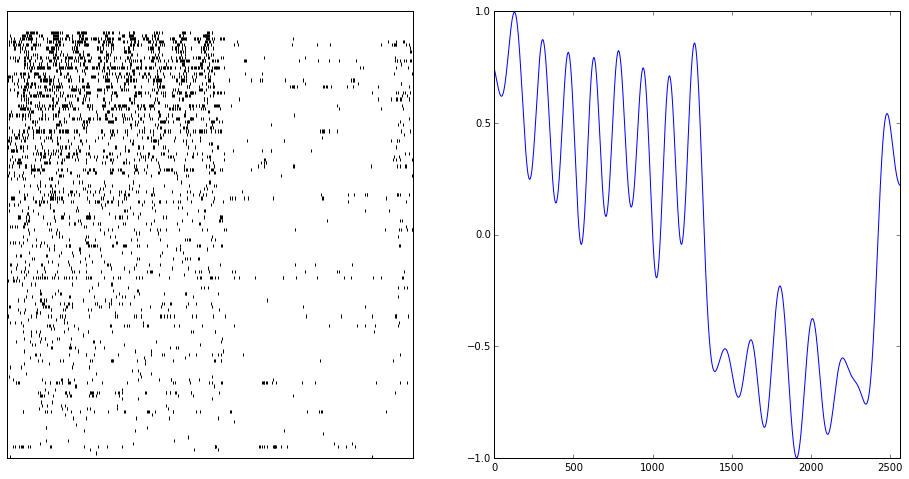

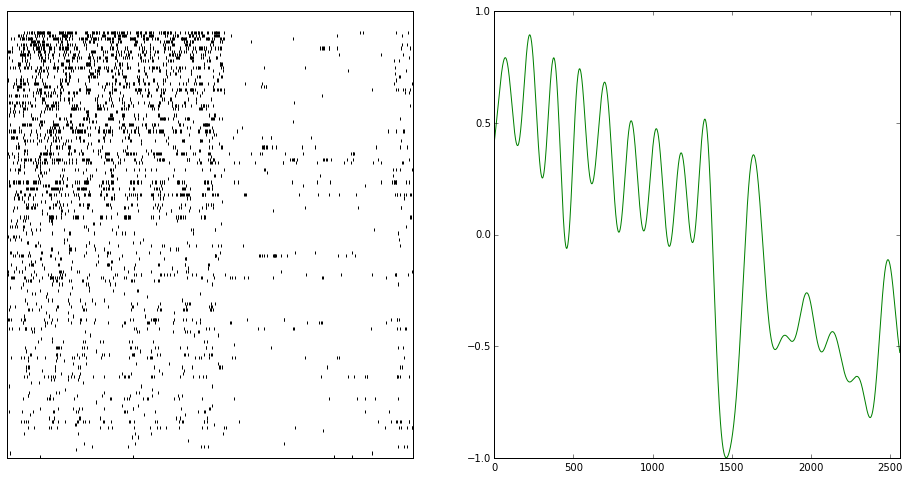

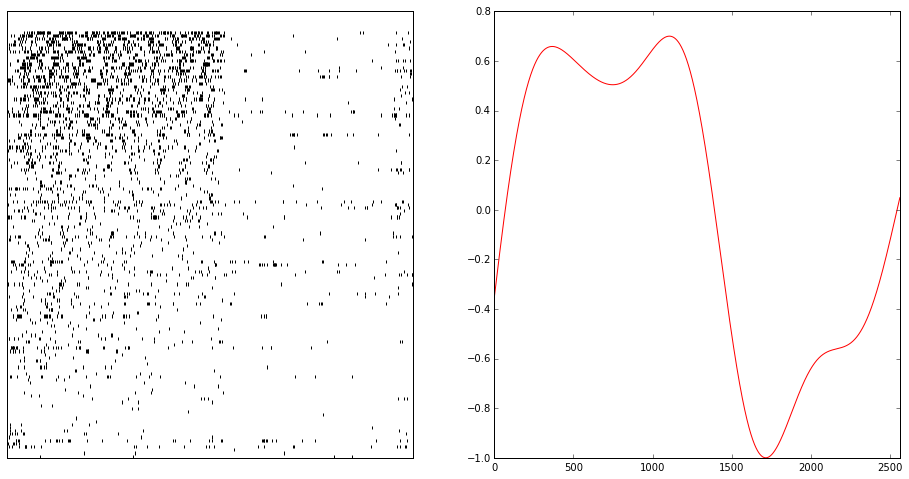

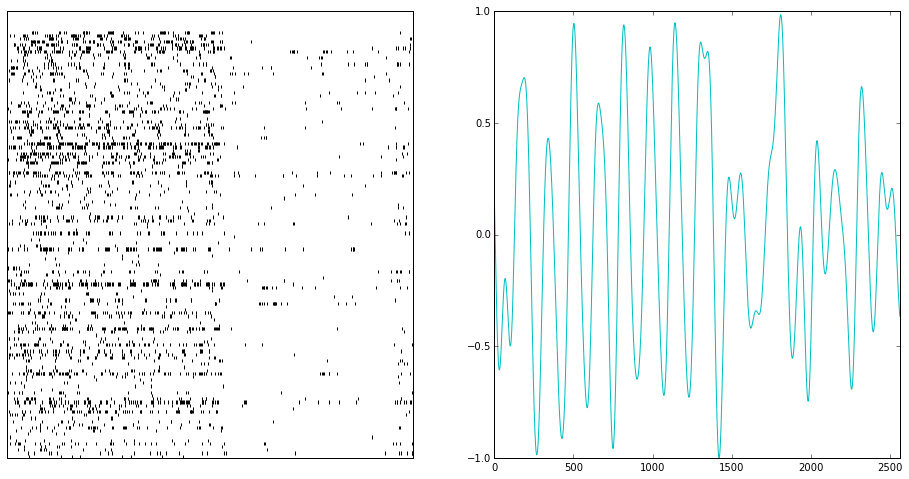

In [338]:
for i in range(N):
    for j in range(4):
        corr[i, j], _ = stats.pearsonr(y[:, i], m1[:, j])
sign = np.array([1, -1, -1, 1])
from matplotlib import gridspec
for l in range(L):
    fig =  figure(figsize=(16, 8))
    gs = gridspec.GridSpec(1, 2)
    ax1 = subplot(gs[0])
    sy = y[:, np.abs(corr[:, l]).argsort()]
    for n in range(N):
        ax1.vlines(np.arange(T)[sy[:, n] > 0], n, n + 1, color='black')
    xticks([])
    yticks([])
    xlim(0, T)
    ax2 = subplot(gs[1])
    ax2.plot(sign[l] * m1[:, l], color=['b', 'g', 'r', 'c'][l])
    xlim(0, T)
    savefig('sorted {}.pdf'.format(l))

/Users/yuan/anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:2542: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


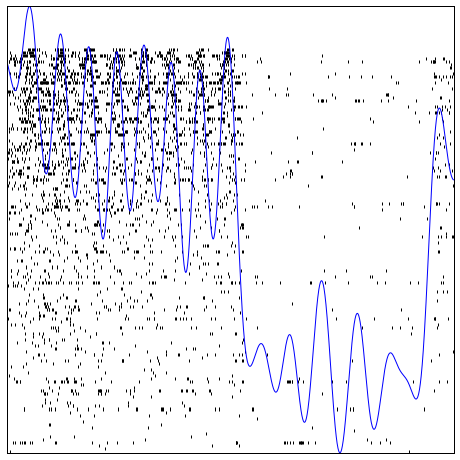

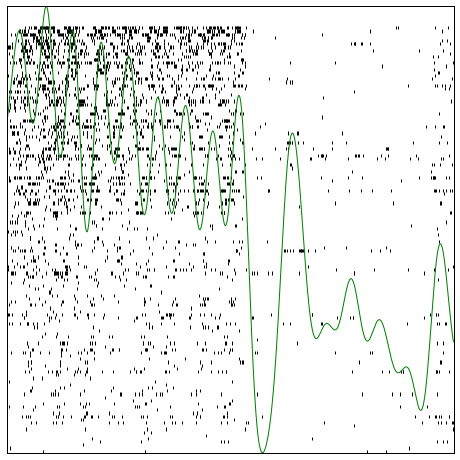

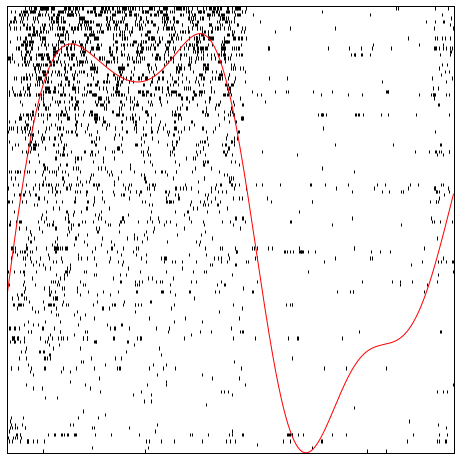

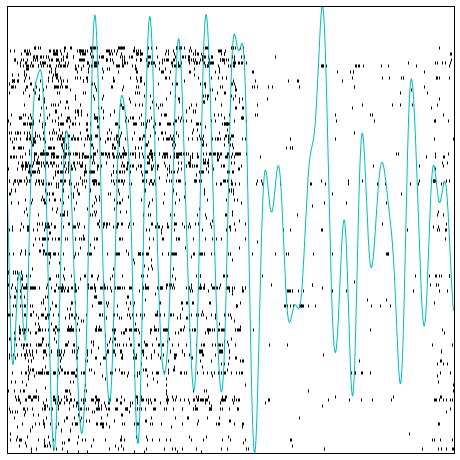

In [345]:
for i in range(N):
    for j in range(4):
        corr[i, j], _ = stats.pearsonr(y[:, i], m1[:, j])
sign = np.array([1, -1, -1, 1])
from matplotlib import gridspec
for l in range(L):
    fig =  figure(figsize=(8, 8))
    sy = y[:, np.abs(corr[:, l]).argsort()]
    for n in range(N):
        vlines(np.arange(T)[sy[:, n] > 0], n, n + 1, color='black')
    xticks([])
    yticks([])
    xlim(0, T)
    hold(True)
    plot((sign[l] * m1[:, l] - np.min(sign[l] * m1[:, l])) * N/2, color=['b', 'g', 'r', 'c'][l])
    xlim(0, T)

In [369]:
rate = y.dot(a1[0, :])

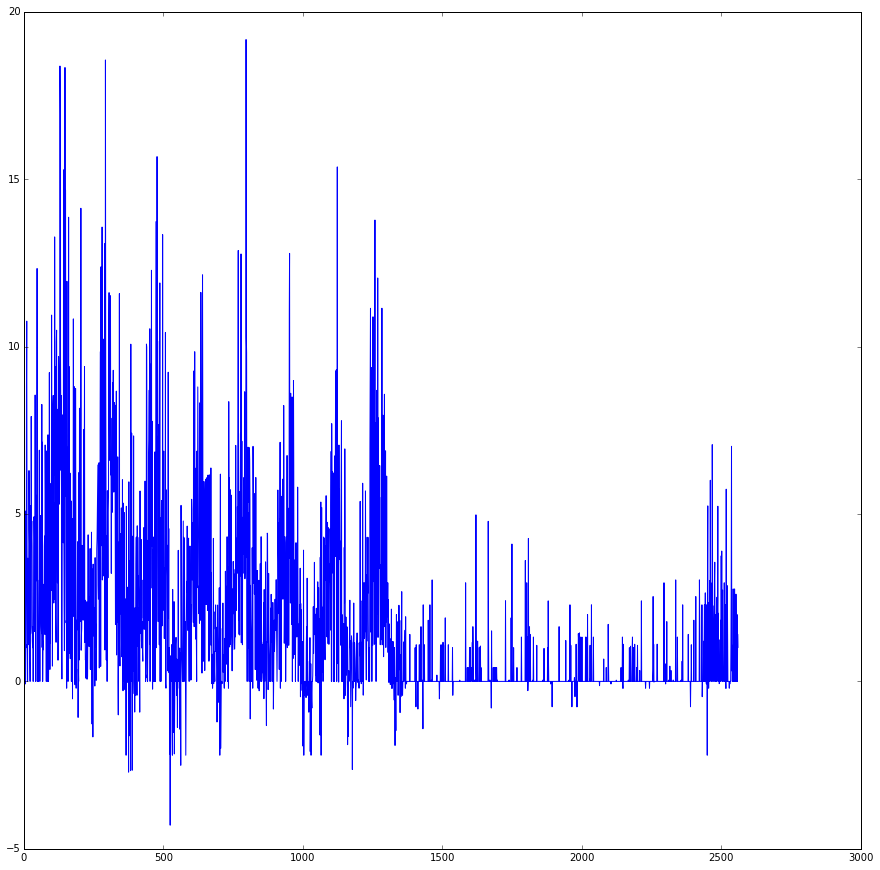

In [370]:
fig =  figure(figsize=(15, 15))
plot(rate)

In [371]:
from scipy import signal
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

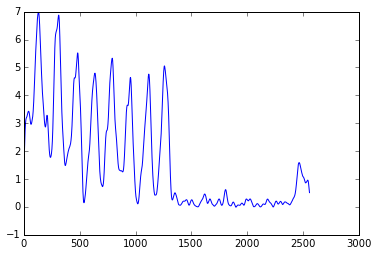

In [372]:
plot(filtered)

In [373]:
sig = y.dot(a1.T)


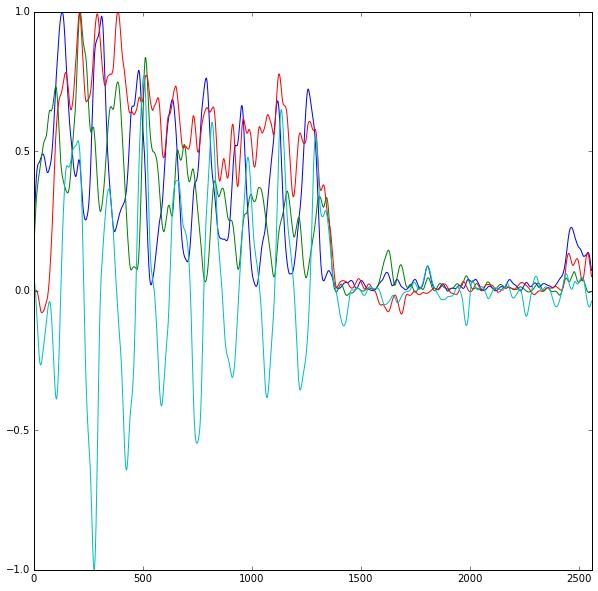

In [385]:
win = signal.hann(50)
figure(figsize=(10, 10))
for l in range(L):
    filtered = signal.convolve(sig[:, l], win, mode='same') / sum(win)
    plot(filtered * np.sign(np.mean(filtered)) / np.max(np.abs(filtered)))
xlim(0, T)
savefig('rate.pdf')

In [51]:
np.random.seed(0)
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
w = L4p1['w'][0]
chol = np.vstack((chol_dict[hash(w[0])][np.newaxis, ...], chol_dict[hash(w[1])][np.newaxis, ...], chol_dict[hash(w[2])][np.newaxis, ...]))
lbound, m1, v1, a1, b1, elapsed, converged = ichol_constrain_m.train(y, 1, chol, a0=a0, b0=None, m0=m0, niter=50, tol=1e-5, verbose=True)


Iteration[1]
lower bound = -149149.23557
increment = 61073780.9745846167
time = 3.59s
change in a = 0.1146065560
change in b = 1.0008441284
change in m = 1.4624556516


Iteration[2]
lower bound = -63235.33443
increment = 85913.9011406033
time = 3.65s
change in a = 0.2705194441
change in b = 1.0021690660
change in m = 0.4075906909


Iteration[3]
lower bound = -32715.34048
increment = 30519.9939528248
time = 3.61s
change in a = 0.2035303180
change in b = 1.1615409150
change in m = 0.4104109324


Iteration[4]
lower bound = -21889.71924
increment = 10825.6212387118
time = 4.11s
change in a = 0.2056805555
change in b = 1.4895656819
change in m = 0.4428389194


Iteration[5]
lower bound = -17931.63659
increment = 3958.0826483427
time = 3.83s
change in a = 0.1920136277
change in b = 3.1260431270
change in m = 0.3480233270


Iteration[6]
lower bound = -16360.29811
increment = 1571.3384783253
time = 3.93s
change in a = 0.2242657675
change in b = 3.7281494141
change in m = 0.2097396153


Iterati

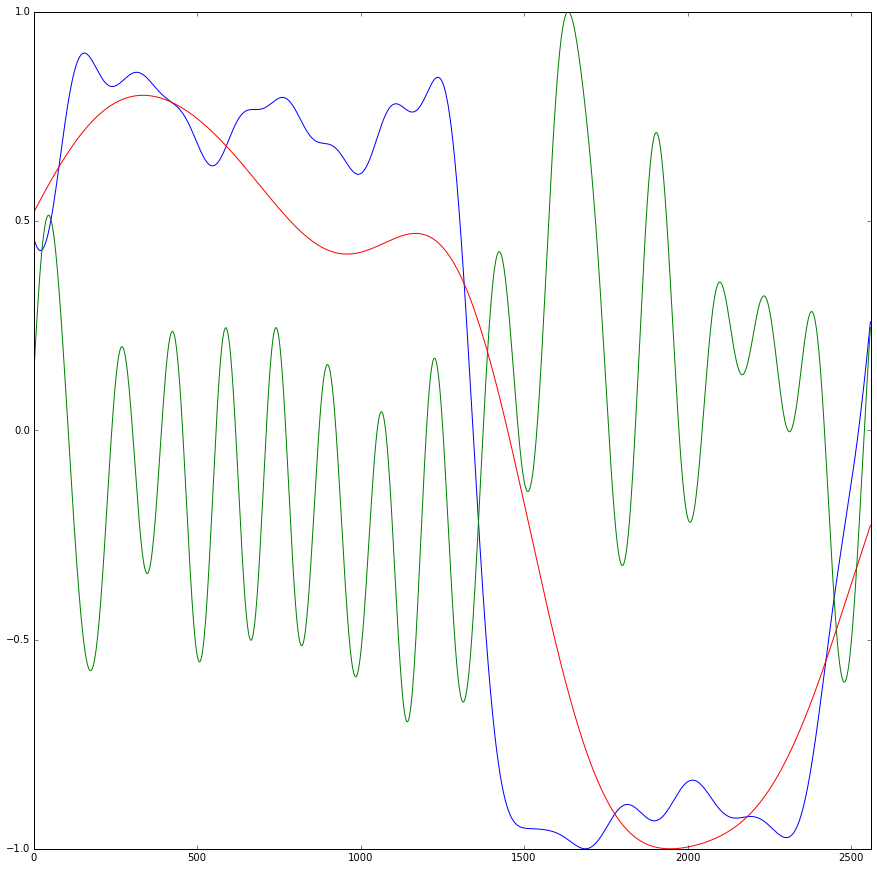

In [45]:
figure(figsize=(15, 15))
xlim(0, T)
plot(m1 * np.sign(np.mean(m1, axis=0)))
savefig('L3p1.pdf')

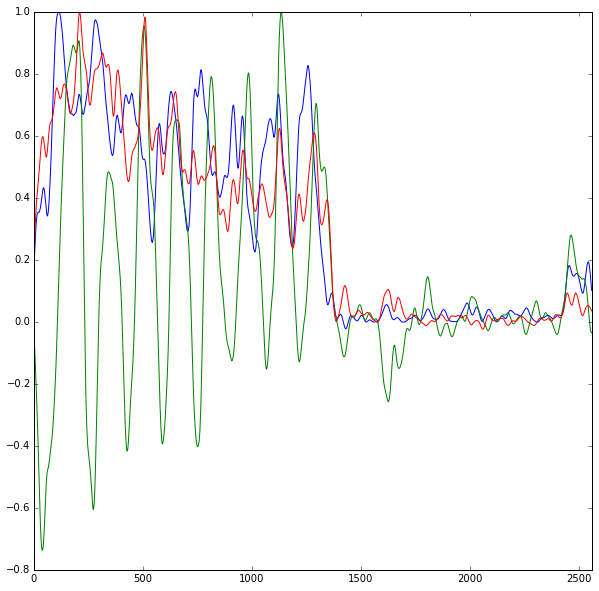

In [48]:
from scipy import signal
win = signal.hann(50)
sig = y.dot(a1.T)
figure(figsize=(10, 10))
for l in range(L):
    filtered = signal.convolve(sig[:, l], win, mode='same') / sum(win)
    plot(filtered * np.sign(np.mean(filtered)) / np.max(np.abs(filtered)))
xlim(0, T)
savefig('rate.pdf')

In [37]:
chol_dict = {}
for w in L4p1['w'][0]:
    chol_dict[hash(w)] = la.ichol_gauss(T, w, 500)

In [39]:
for w in L4p1['w'][0]:
    print(w)

0.0001
0.0001
4e-06
0.0004


In [34]:
w = L4p1['w']

In [35]:
w

array([[  1.00000000e-04,   1.00000000e-04,   4.00000000e-06,
          4.00000000e-04]])

In [36]:
w[0]

array([  1.00000000e-04,   1.00000000e-04,   4.00000000e-06,
         4.00000000e-04])

In [52]:
L3p1 = {}
L3p1['m'] = m1
L3p1['a'] = a1
L3p1['b'] = b1
L3p1['ELBO'] = lbound
L3p1['v'] = v1

In [56]:
import util
h = util.makeregressor(y, 1)

In [60]:
lv = np.empty((L, T, 500), dtype=float)
lam = ichol_constrain_m.firingrate(h, m1, v1, a1, b1)
eyek = np.identity(500)
from scipy import linalg
for l in range(L):
    G = chol[l]
    w = lam.dot(a1[l, :] ** 2).reshape((T, 1))
    w.clip(np.finfo(float).tiny, np.exp(15), out=w)  # avoid zeros and infinities
    GTWG = G.T.dot(w * G)
    A = eyek - GTWG + GTWG.dot(linalg.solve(eyek + GTWG, GTWG, sym_pos=True))  # A should be pd but numerically not
    # A = eyek - GTWG.dot(GTWG + GTWG.dot(GTWG)).dot(GTWG)  # wrong
    # lv[l, :] = G.dot(ichol2(A))
    eigval, eigvec = linalg.eigh(A)
    eigval.clip(0, np.PINF, out=eigval)  # remove negative eigenvalues
    lv[l, :] = G.dot(eigvec.dot(np.diag(np.sqrt(eigval))))

In [61]:
lv.shape

(3, 2560, 500)

In [62]:
z = np.random.normal(size=(500, 100))

In [63]:
z.shape

(500, 100)

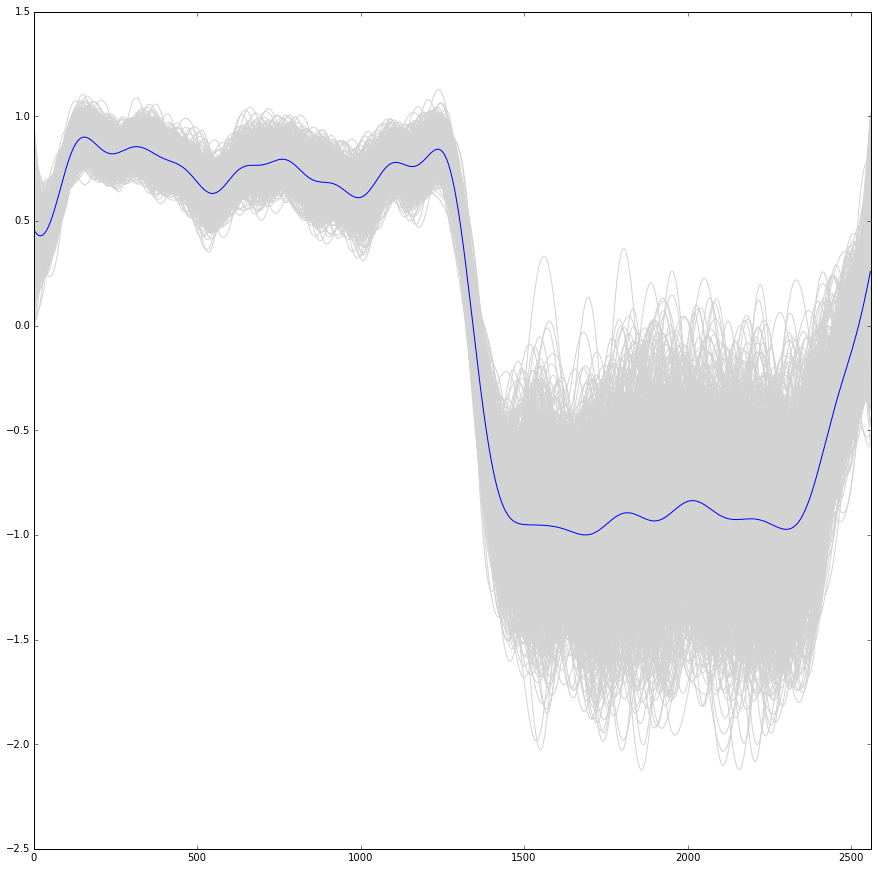

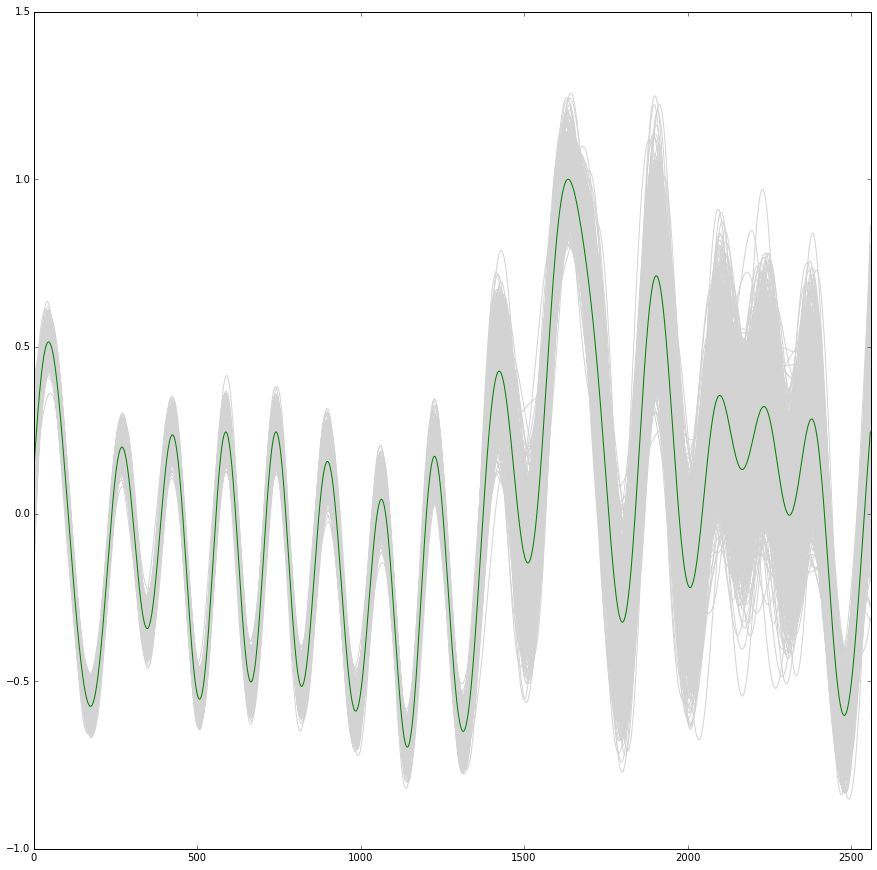

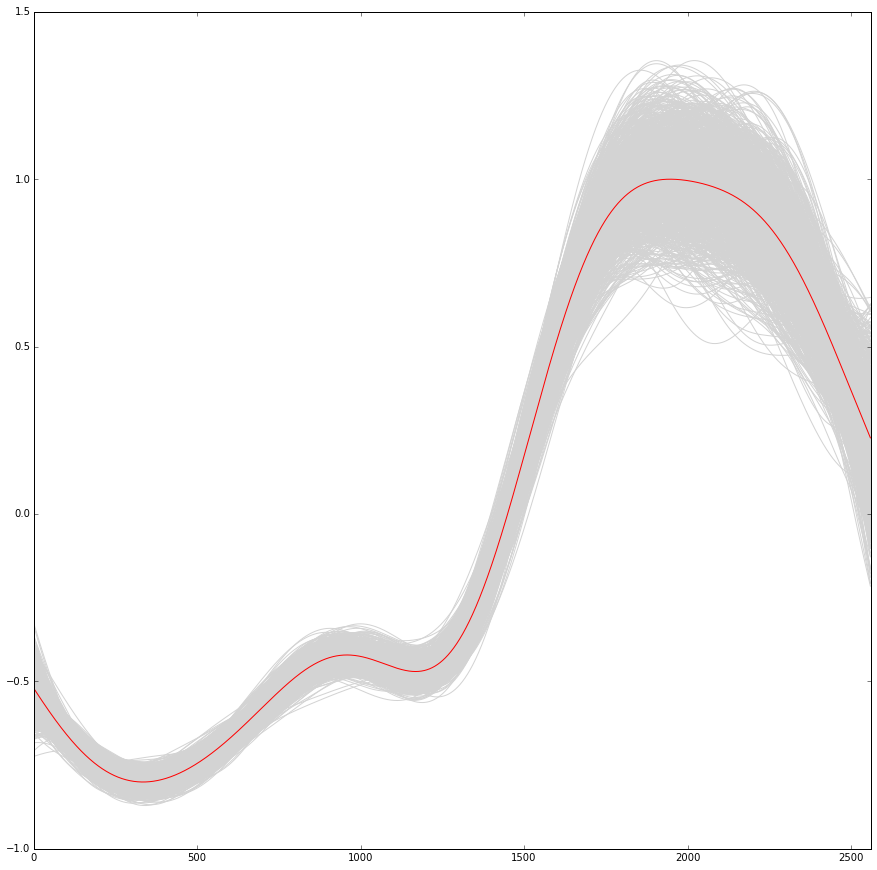

In [78]:
for l in range(L):
    z = np.random.normal(size=(500, 1000))
    figure(figsize=(15, 15))
    xlim(0, T)
    plot(lv[l, :].dot(z) + m1[:, l, np.newaxis], color='lightgrey')
    plot(m1[:, l], color=['b', 'g', 'r'][l])
    savefig('L{}.pdf'.format(l + 1))

In [15]:
bmask = np.full((1+N, N), fill_value=False, dtype=bool)
bmask[0, :] = True
bmask[1:N+1, :] = np.eye(N, dtype=bool)

In [17]:
np.random.seed(0)
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)
chol = np.vstack((chol_dict[1e-4][np.newaxis, ...], chol_dict[1e-4][np.newaxis, ...], chol_dict[1e-5][np.newaxis, ...]))
lbound, m1, v1, a1, b1, elapsed, converged = ichol_constrain_m2.train(y, 1, chol=chol, a0=a0, b0=None, bmask=bmask, m0=m0, niter=50, tol=1e-5, verbose=True)


Iteration[1]
lower bound = -162539.47271
increment = 61299589.5403906628
time = 4.24s
change in a = 0.1848319271
change in b = 2.5673055138
change in m = 1.4180969861


Iteration[2]
lower bound = -73448.80931
increment = 89090.6634069859
time = 4.34s
change in a = 0.3229203670
change in b = 2.5279092895
change in m = 0.6180874850


Iteration[3]
lower bound = -39094.01340
increment = 34354.7959042959
time = 4.36s
change in a = 0.3053230105
change in b = 2.5240438073
change in m = 0.4708955436


Iteration[4]
lower bound = -26826.09459
increment = 12267.9188141206
time = 4.43s
change in a = 0.4076351794
change in b = 2.5229170709
change in m = 0.3391286702


Iteration[5]
lower bound = -22456.03483
increment = 4370.0597538817
time = 4.48s
change in a = 0.3743313240
change in b = 2.5240158445
change in m = 0.4220491802


Iteration[6]
lower bound = -21205.49066
increment = 1250.5441716342
time = 4.39s
change in a = 0.4616282302
change in b = 2.5220814013
change in m = 0.2519656814


Iterati

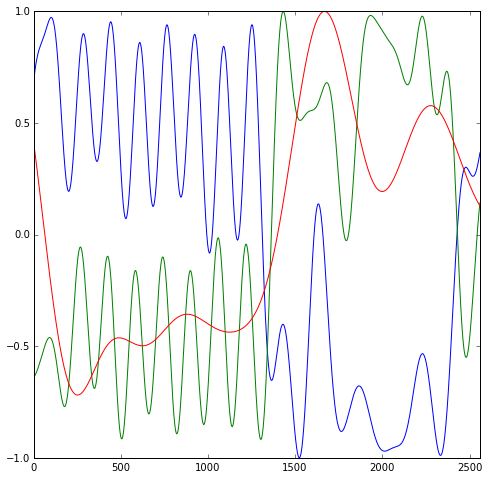

In [31]:
figure(figsize=(8, 8))
xlim(0, T)
plot(m1)

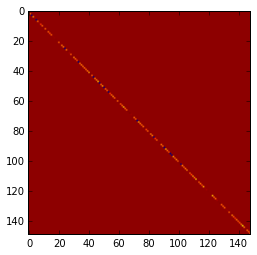

In [19]:
imshow(b1)

In [35]:
sim, _, _ = simulation.spikes(m1, a1, b1, intercept=True)

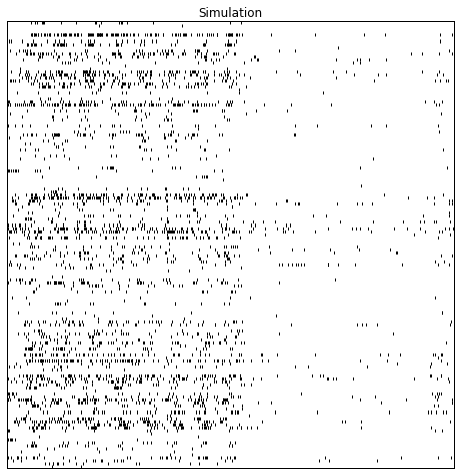

In [43]:
figure(figsize=(8, 8))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[sim[:, n] > 0], n, n + 1, color='black')
xticks([])
yticks([])
gca().invert_yaxis()
title('Simulation')

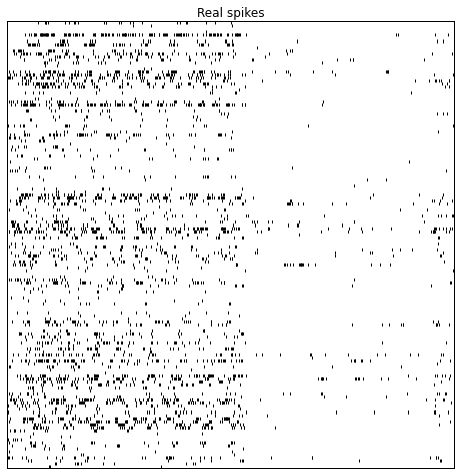

In [46]:
figure(figsize=(8, 8))
ylim(0, N)
xlim(0, T)
for n in range(N):
    vlines(np.arange(T)[y[:, n] > 0], n, n + 1, color='black')
xticks([])
yticks([])
gca().invert_yaxis()
title('Real spikes')